In [1]:
!pip install --upgrade pingouin

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
from math import pi
from matplotlib.gridspec import GridSpec
from dateutil.relativedelta import *
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats
import pingouin as pg

In [3]:
# COMMON VARIABLES

alg_to_analyze = [
    'oplexicon_sentiment_analysis_score',
    'oplexicon_sentiment_analysis_polarity'
]

tpd_columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]

clean_df_columns = [
    'text',
    'final_score',
    'final_polarity',
    'vader_sentiment_analysis_score',
    'vader_sentiment_analysis_polarity',
    'sentistrength_sentiment_analysis_score',
    'sentistrength_sentiment_analysis_polarity',
    'sentilexpt_sentiment_analysis_score',
    'sentilexpt_sentiment_analysis_polarity'
]

In [4]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py'

Starting script...
Removing existing file...
Ending script...


In [5]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')
data.head()

26                       27  \
id_str_twitter                23781146                 15148309   
name                      Fe Rebelatto      Sommelier de Airbnb   
screen_name                  rebelatto                Guilh_rm_   
location        Rio de Janeiro, Brasil      somewhere in Brazil   
url                               None  https://t.co/gX4oRZWHg3   

                                     28                                   29  \
id_str_twitter       927028057763995648                             77648005   
name                          ✪ Felippe  Conference Distinguished Specialist   
screen_name              FelippeRegazio                              NannoKa   
location                                                      Ctba-PR Brasil   
url             https://t.co/KkaPlVH4Wu              https://t.co/hDni4Fh2Ng   

                                     30                        31  \
id_str_twitter               3429765093                  10794662   
name                      Paula Santana  Maharaja of the Legacies   
screen_name                  psanrosa13                    rponte   
location                         Brasil             Ceará, Brazil   
url             https://t.co/YJQuDtv2YW   https://t.co/3yZ94QNQvs   

                                     32                             33  \
id_str_twitter      1034514325644431361                      529445600   
name                            Jessica  var nickname = "Riquettinha";   
screen_name                   dev_jessi                    Riquettinha   
location             São Paulo - Brasil         Belo Horizonte, Brasil   
url             https://t.co/MtUeSEBICu        https://t.co/QU71LJgSuD   

                               34                       35  \
id_str_twitter           12050562                 62314491   
name            Roberta Arcoverde                 Gabriela   
screen_name                  rla4          Gabrielathalita   
location        Sao Paulo, Brazil           Belo Horizonte   
url                          None  https://t.co/AmkOKWlftK   

                                     36                       37  \
id_str_twitter                 18289937                172880784   
name                    Thamara Andrade              felipe.ts ⚡   
screen_name                      thamyk            felipefialho_   
location        Belo Horizonte, Brazil.    Dark Side of the Moon   
url             https://t.co/JWBzdmQOcV  https://t.co/yPuEuh1bn9   

                                     38  
id_str_twitter                 18609547  
name                         Juan Lopes  
screen_name                  juanplopes  
location         Rio de Janeiro, Brasil  
url             https://t.co/Uhw9rEUK2v

In [6]:
def clean_df(df):
    for c in clean_df_columns:
        del df[c]

In [7]:
def create_tweets_pd(data, id_user):

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    del tweets_pd[0]
    del tweets_pd[1]
    del tweets_pd[4]
    del tweets_pd[5]
    del tweets_pd[6]
    del tweets_pd[18]
    
    tweets_pd.columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]
 
    return tweets_pd

In [8]:
def create_line_plot(df_result, id_user):
    df_result["created_at"] = pd.to_datetime(df_result["created_at"])
    df_result['date_minus_time'] = df_result["created_at"].apply( lambda df_result : datetime.datetime(year=df_result.year, month=df_result.month, day=df_result.day))
    df_result.set_index(df_result["date_minus_time"],inplace=True)

    new_df = pd.DataFrame(df_result[alg_to_analyze[0]].resample('W').mean())

    new_df['week'] = range(1, len(new_df.index) + 1)

    x = new_df["week"]
    y = new_df[alg_to_analyze[0]]

    tickvalues = range(0, int(len(x)), 2)

    if len(tickvalues) > len(x[1::2]):
        tickvalues = range(0, int(len(x)) - (len(tickvalues) - len(x[1::2])), 2)

    fig = plt.figure(figsize=(16,6))

    plt.xticks(ticks = tickvalues ,labels = x[1::2], rotation = 'vertical')

    plt.title("Tweets OpLexicon polarity per week - Participant {}".format(id_user))
    plt.ylabel("Polarity")
    plt.xlabel("Weeks")

    plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*0.05, max_ylim*0.12, 'Mean: {:.2f}'.format(y.mean()))

    plt.plot(x,y)

In [9]:
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    
#     create_line_plot(tweets_pd, id_user)

In [10]:
# DATA CONSIDERING THE NEUTRAL POLARITY

df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean' : []
          }

for c in data:
    id_user = c
    print('id_user: {}'.format(id_user))
    print('lexicon: OpLexicon')
    tweets_pd = create_tweets_pd(data, id_user)
    vader_df = tweets_pd[['id_user', alg_to_analyze[0], alg_to_analyze[1]]].copy()
    print('mean: {}'.format(vader_df[alg_to_analyze[0]].mean()))
    qtd_pos = vader_df.query(alg_to_analyze[1] + ' == "pos"')['id_user'].count()
    qtd_neu = vader_df.query(alg_to_analyze[1] + ' == "neu"')['id_user'].count()
    qtd_neg = vader_df.query(alg_to_analyze[1] + ' == "neg"')['id_user'].count()
    qtd_total = vader_df[alg_to_analyze[1]].count()
    print('pos: {}'.format(qtd_pos))
    print('neu: {}'.format(qtd_neu))
    print('neg: {}'.format(qtd_neg))
    print('% pos: {}'.format((qtd_pos / qtd_total) * 100))
    print('% neu: {}'.format((qtd_neu / qtd_total) * 100))
    print('% neg: {}'.format((qtd_neg / qtd_total) * 100))
    print('')
    df_dict['id_user'].append(id_user)
    df_dict['pos'].append(qtd_pos)
    df_dict['neu'].append(qtd_neu)
    df_dict['neg'].append(qtd_neg)
    df_dict['por_pos'].append((qtd_pos / qtd_total) * 100)
    df_dict['por_neu'].append((qtd_neu / qtd_total) * 100)
    df_dict['por_neg'].append((qtd_neg / qtd_total) * 100)
    df_dict['mean'].append(vader_df[alg_to_analyze[0]].mean())

df_chart = pd.DataFrame(df_dict)
df_chart
    

id_user: 26
lexicon: OpLexicon
mean: 0.06711998257590775
pos: 1884
neu: 2173
neg: 982
% pos: 37.38837070847391
% neu: 43.12363564199246
% neg: 19.48799364953364

id_user: 27
lexicon: OpLexicon
mean: 0.06301535393932726
pos: 1792
neu: 1832
neg: 925
% pos: 39.393273246867444
% neu: 40.272587381842165
% neg: 20.334139371290394

id_user: 28
lexicon: OpLexicon
mean: 0.07917601646721645
pos: 2401
neu: 2182
neg: 1350
% pos: 40.468565649755604
% neu: 36.77734704196865
% neg: 22.754087308275746

id_user: 29
lexicon: OpLexicon
mean: 0.0954082766198865
pos: 1584
neu: 1172
neg: 593
% pos: 47.297700806210806
% neu: 34.99552105106002
% neg: 17.706778142729174

id_user: 30
lexicon: OpLexicon
mean: 0.17540825655737668
pos: 1878
neu: 869
neg: 425
% pos: 59.20554854981085
% neu: 27.395964691046657
% neg: 13.398486759142497

id_user: 31
lexicon: OpLexicon
mean: 0.10635618660273573
pos: 3114
neu: 1709
neg: 1173
% pos: 51.9346230820547
% neu: 28.502334889926615
% neg: 19.56304202801868

id_user: 32
lexicon

id_user   pos   neu   neg    por_pos    por_neu    por_neg      mean
0        26  1884  2173   982  37.388371  43.123636  19.487994  0.067120
1        27  1792  1832   925  39.393273  40.272587  20.334139  0.063015
2        28  2401  2182  1350  40.468566  36.777347  22.754087  0.079176
3        29  1584  1172   593  47.297701  34.995521  17.706778  0.095408
4        30  1878   869   425  59.205549  27.395965  13.398487  0.175408
5        31  3114  1709  1173  51.934623  28.502335  19.563042  0.106356
6        32  4925  2750  1499  53.684325  29.976019  16.339656  0.146175
7        33   983   737   611  42.170742  31.617332  26.211926  0.069913
8        34   783   480   282  50.679612  31.067961  18.252427  0.124757
9        35  1021  1109   465  39.344894  42.736031  17.919075  0.086705
10       36   175   209    84  37.393162  44.658120  17.948718  0.072440
11       37  3218  2306   932  49.845105  35.718711  14.436183  0.115668
12       38  1956  1504  1248  41.546304  31.945624  26.508071  0.070740

In [11]:
# DATA WITHOUT THE NEUTRAL POLARITY

df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean_all' : [],
            'mean_posneg' : []
          }

for c in data:
    id_user = c
    print('id_user: {}'.format(id_user))
    print('lexicon: OpLexicon')
    tweets_pd = create_tweets_pd(data, id_user)
    vader_df = tweets_pd[['id_user', alg_to_analyze[0], alg_to_analyze[1]]].copy()
    final_score = vader_df.query(alg_to_analyze[1] + ' == "pos"')[alg_to_analyze[0]].tolist()
    final_score.extend(vader_df.query(alg_to_analyze[1] + ' == "neg"')[alg_to_analyze[0]].tolist())
    print(len(final_score))
    print(statistics.mean(final_score))
    print('mean: {}'.format(vader_df[alg_to_analyze[0]].mean()))
    qtd_pos = vader_df.query(alg_to_analyze[1] + ' == "pos"')['id_user'].count()
    qtd_neu = vader_df.query(alg_to_analyze[1] + ' == "neu"')['id_user'].count()
    qtd_neg = vader_df.query(alg_to_analyze[1] + ' == "neg"')['id_user'].count()
    qtd_total = vader_df[alg_to_analyze[1]].count()
    print('pos: {}'.format(qtd_pos))
    print('neu: {}'.format(qtd_neu))
    print('neg: {}'.format(qtd_neg))
    print('% pos: {}'.format((qtd_pos / qtd_total) * 100))
    print('% neu: {}'.format((qtd_neu / qtd_total) * 100))
    print('% neg: {}'.format((qtd_neg / qtd_total) * 100))
    print('')
    df_dict['id_user'].append(id_user)
    df_dict['pos'].append(qtd_pos)
    df_dict['neu'].append(qtd_neu)
    df_dict['neg'].append(qtd_neg)
    df_dict['por_pos'].append((qtd_pos / qtd_total) * 100)
    df_dict['por_neu'].append((qtd_neu / qtd_total) * 100)
    df_dict['por_neg'].append((qtd_neg / qtd_total) * 100)
    df_dict['mean_all'].append(vader_df[alg_to_analyze[0]].mean())
    df_dict['mean_posneg'].append(statistics.mean(final_score))

df_chart = pd.DataFrame(df_dict)
df_chart
    

id_user: 26
lexicon: OpLexicon
2866
0.11801032526168877
mean: 0.06711998257590775
pos: 1884
neu: 2173
neg: 982
% pos: 37.38837070847391
% neu: 43.12363564199246
% neg: 19.48799364953364

id_user: 27
lexicon: OpLexicon
2717
0.1055049116930438
mean: 0.06301535393932726
pos: 1792
neu: 1832
neg: 925
% pos: 39.393273246867444
% neu: 40.272587381842165
% neg: 20.334139371290394

id_user: 28
lexicon: OpLexicon
3751
0.12523361922154091
mean: 0.07917601646721645
pos: 2401
neu: 2182
neg: 1350
% pos: 40.468565649755604
% neu: 36.77734704196865
% neg: 22.754087308275746

id_user: 29
lexicon: OpLexicon
2177
0.14677185043638033
mean: 0.0954082766198865
pos: 1584
neu: 1172
neg: 593
% pos: 47.297700806210806
% neu: 34.99552105106002
% neg: 17.706778142729174

id_user: 30
lexicon: OpLexicon
2303
0.2415957402518454
mean: 0.17540825655737668
pos: 1878
neu: 869
neg: 425
% pos: 59.20554854981085
% neu: 27.395964691046657
% neg: 13.398486759142497

id_user: 31
lexicon: OpLexicon
4287
0.148754769038955
mean:

id_user   pos   neu   neg    por_pos    por_neu    por_neg  mean_all  \
0        26  1884  2173   982  37.388371  43.123636  19.487994  0.067120   
1        27  1792  1832   925  39.393273  40.272587  20.334139  0.063015   
2        28  2401  2182  1350  40.468566  36.777347  22.754087  0.079176   
3        29  1584  1172   593  47.297701  34.995521  17.706778  0.095408   
4        30  1878   869   425  59.205549  27.395965  13.398487  0.175408   
5        31  3114  1709  1173  51.934623  28.502335  19.563042  0.106356   
6        32  4925  2750  1499  53.684325  29.976019  16.339656  0.146175   
7        33   983   737   611  42.170742  31.617332  26.211926  0.069913   
8        34   783   480   282  50.679612  31.067961  18.252427  0.124757   
9        35  1021  1109   465  39.344894  42.736031  17.919075  0.086705   
10       36   175   209    84  37.393162  44.658120  17.948718  0.072440   
11       37  3218  2306   932  49.845105  35.718711  14.436183  0.115668   
12       38  1956  1504  1248  41.546304  31.945624  26.508071  0.070740   

    mean_posneg  
0      0.118010  
1      0.105505  
2      0.125234  
3      0.146772  
4      0.241596  
5      0.148755  
6      0.208750  
7      0.102237  
8      0.180985  
9      0.151412  
10     0.130896  
11     0.179941  
12     0.103946

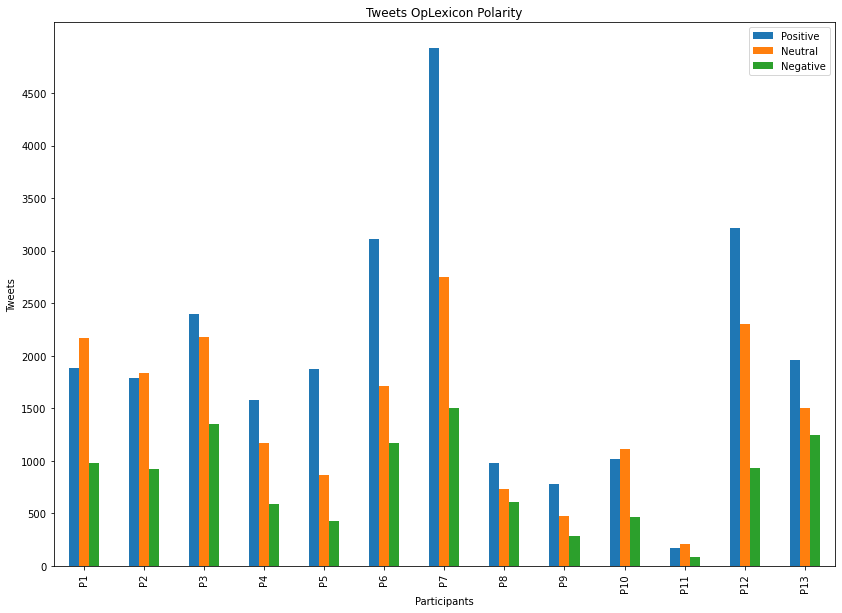

In [12]:
# multiple bar plots

bar_chart_data = []

y_range = range(0,4501, 500)

for i in df_chart.index:
    d = ['P{}'.format(i+1), df_chart.iloc[i]['pos'], df_chart.iloc[i]['neu'], df_chart.iloc[i]['neg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","pos","neu","neg"])
df.plot(yticks = y_range, x="Participant", y=["pos", "neu", "neg"], kind="bar",figsize=(14,10))

plt.legend(["Positive", "Neutral", "Negative"])
plt.title('Tweets OpLexicon Polarity')
plt.xlabel('Participants')
plt.ylabel('Tweets')

plt.show()

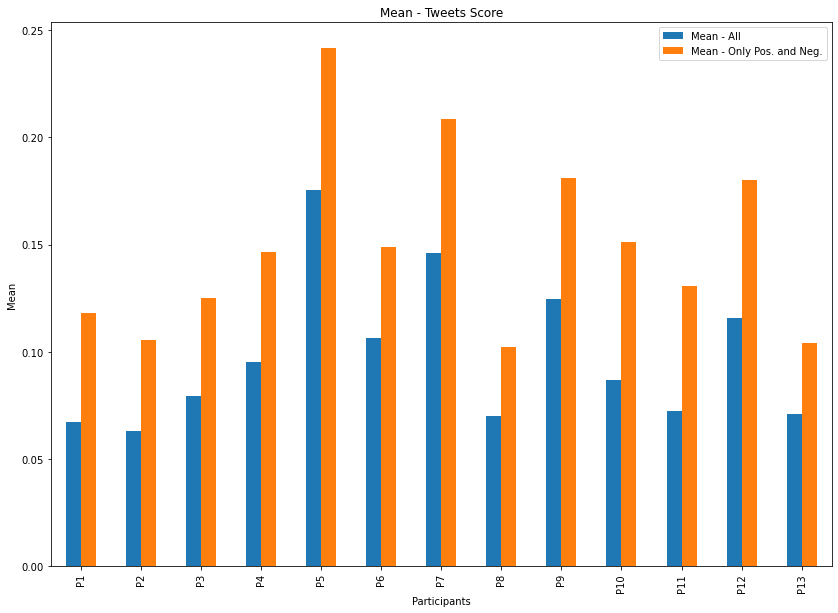

In [13]:
# multiple bar plots with means

bar_chart_data = []

y_range = range(-1,1)

for i in df_chart.index:
    d = ['P{}'.format(i+1), df_chart.iloc[i]['mean_all'], df_chart.iloc[i]['mean_posneg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","mean_all","mean_posneg"])
df.plot(x="Participant", y=["mean_all", "mean_posneg"], kind="bar",figsize=(14,10))

plt.legend(["Mean - All", "Mean - Only Pos. and Neg."])
plt.title('Mean - Tweets Score')
plt.xlabel('Participants')
plt.ylabel('Mean')

plt.show()

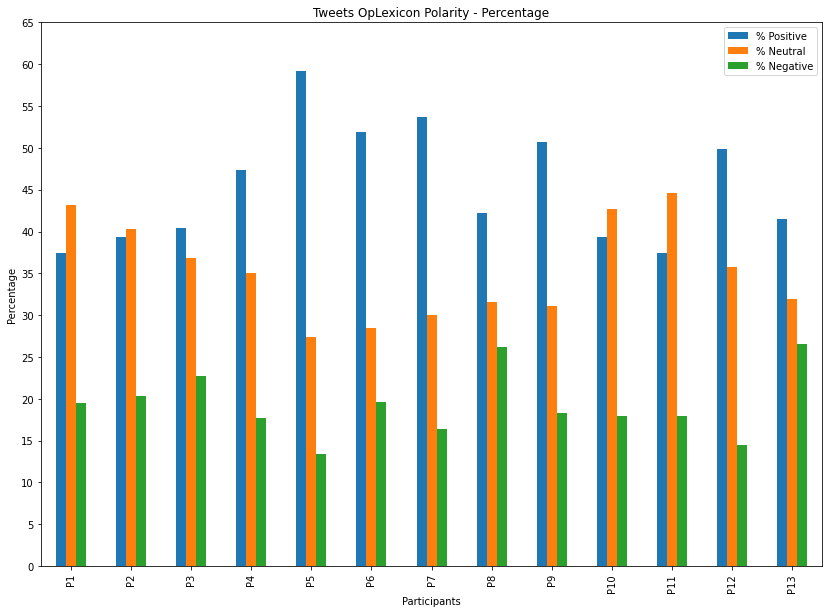

In [14]:
# multiple line plots

bar_chart_data = []

y_range = range(0, 70, 5)

for i in df_chart.index:
    d = ['P{}'.format(i+1), df_chart.iloc[i]['por_pos'], df_chart.iloc[i]['por_neu'], df_chart.iloc[i]['por_neg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","por_pos","por_neu","por_neg"])
df.plot(yticks = y_range, x="Participant", y=["por_pos", "por_neu", "por_neg"], kind="bar",figsize=(14,10))


plt.legend(['% Positive', '% Neutral', '% Negative'])
plt.title('Tweets OpLexicon Polarity - Percentage')
plt.xlabel('Participants')
plt.ylabel('Percentage')

plt.show()

In [15]:
bigfive = {}

for c in data:
    id_user = c

    df_bf = pd.DataFrame(data[id_user]['bigfive'])
    
    if df_bf.empty == False:
        id = int(df_bf[6])

        del df_bf[0]
        del df_bf[6]

        df_bf.columns = ['O', 'C', 'E', 'A', 'N']

        bigfive[id] = df_bf

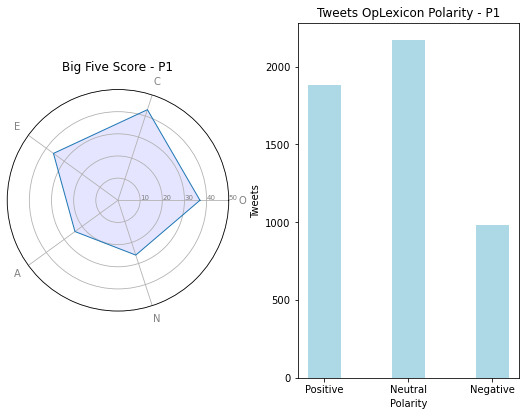

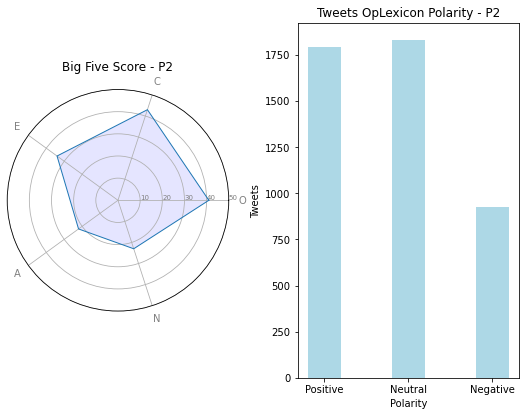

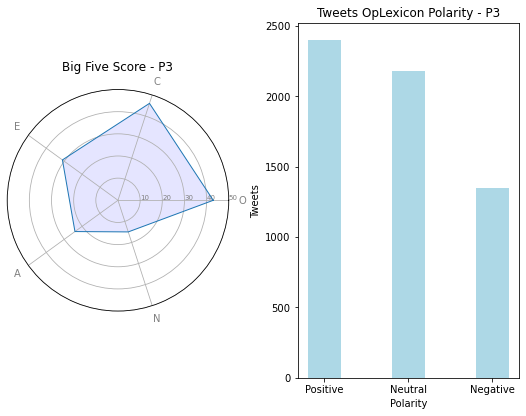

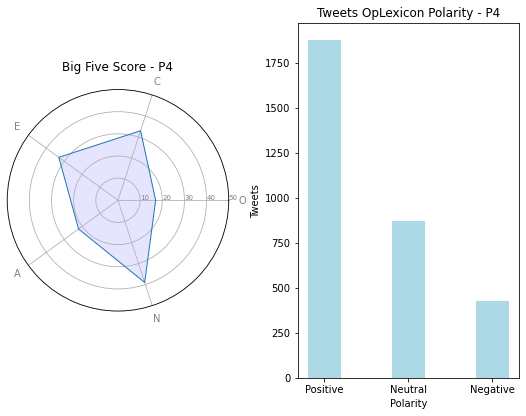

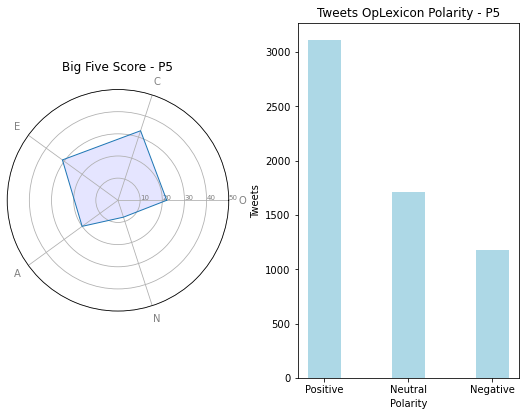

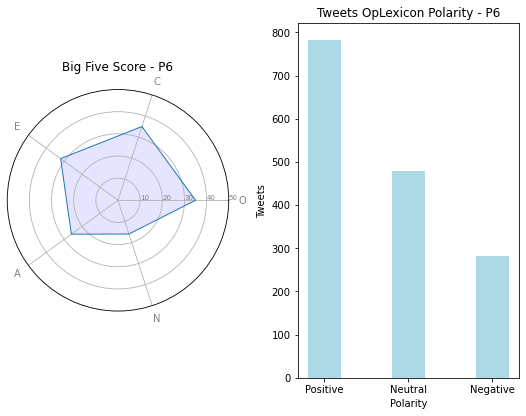

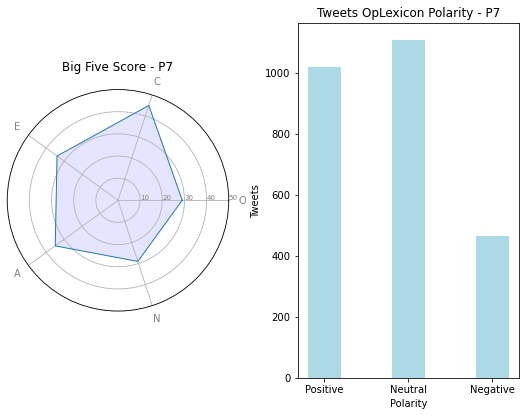

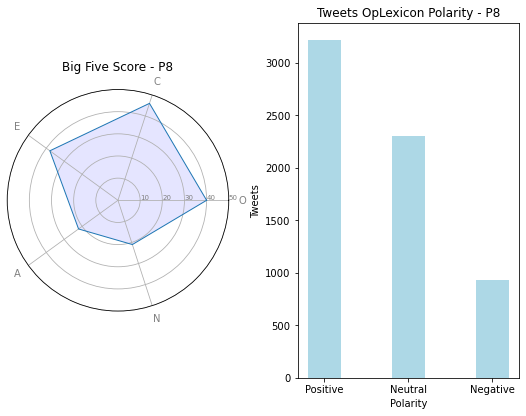

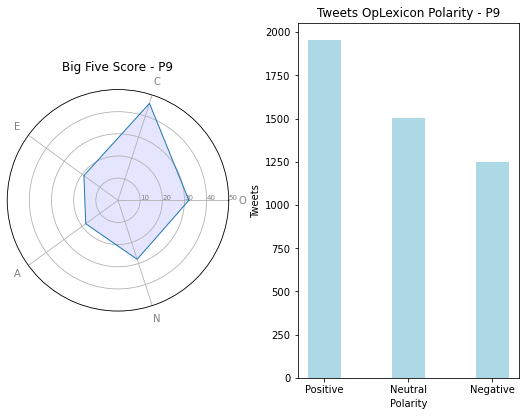

In [16]:
count = 1

for i in bigfive:
    b = bigfive[i]

    o = [b['O']]
    c = [b['C']]
    e = [b['E']]
    a = [b['A']]
    n = [b['N']]

    # Set data
    df = pd.DataFrame({
    'group': ['A'],
    'O': o,
    'C': c,
    'E': e,
    'A': a,
    'N': n
    })

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    
    fig = plt.figure(figsize=(8, 6))
    gs = GridSpec(nrows=1, ncols=2)
    
    # Initialise the spider plot
    ax = fig.add_subplot(gs[0, 0])
    ax = plt.subplot(121, polar=True)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=10)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30, 40, 50], ["10","20","30", '40', '50'], color="grey", size=7)
    plt.ylim(0,50)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title('Big Five Score - P{}'.format(count))
    
#     plt.tight_layout()

    # Show the graph
#     plt.show()
    
    plt.subplot(122)
    
    y_range = range(0,6001, 500)

    d = {"Positive": int(df_chart.query('id_user == {}'.format(i))['pos']), 
         "Neutral": int(df_chart.query('id_user == {}'.format(i))['neu']), 
         "Negative": int(df_chart.query('id_user == {}'.format(i))['neg'])}
    
#     plt.figure(figsize = (8, 6))

    plt.tight_layout(pad=2.8)
#     plt.subplot_tool()
 
    # creating the bar plot
    plt.bar(d.keys(), d.values(), width = 0.4, color = 'lightblue')

    plt.title('Tweets OpLexicon Polarity - P{}'.format(count))
    plt.xlabel('Polarity')
    plt.ylabel('Tweets')

    plt.show()
    
    count += 1

In [17]:
df_chart

id_user   pos   neu   neg    por_pos    por_neu    por_neg  mean_all  \
0        26  1884  2173   982  37.388371  43.123636  19.487994  0.067120   
1        27  1792  1832   925  39.393273  40.272587  20.334139  0.063015   
2        28  2401  2182  1350  40.468566  36.777347  22.754087  0.079176   
3        29  1584  1172   593  47.297701  34.995521  17.706778  0.095408   
4        30  1878   869   425  59.205549  27.395965  13.398487  0.175408   
5        31  3114  1709  1173  51.934623  28.502335  19.563042  0.106356   
6        32  4925  2750  1499  53.684325  29.976019  16.339656  0.146175   
7        33   983   737   611  42.170742  31.617332  26.211926  0.069913   
8        34   783   480   282  50.679612  31.067961  18.252427  0.124757   
9        35  1021  1109   465  39.344894  42.736031  17.919075  0.086705   
10       36   175   209    84  37.393162  44.658120  17.948718  0.072440   
11       37  3218  2306   932  49.845105  35.718711  14.436183  0.115668   
12       38  1956  1504  1248  41.546304  31.945624  26.508071  0.070740   

    mean_posneg  
0      0.118010  
1      0.105505  
2      0.125234  
3      0.146772  
4      0.241596  
5      0.148755  
6      0.208750  
7      0.102237  
8      0.180985  
9      0.151412  
10     0.130896  
11     0.179941  
12     0.103946

[Text(1, 0, 'Positive'), Text(2, 0, 'Negative'), Text(3, 0, 'Neutral')]

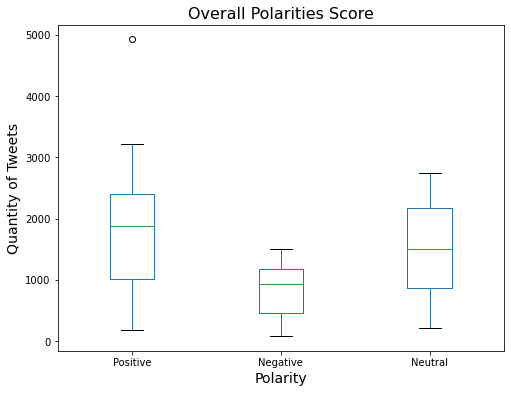

In [18]:
bplot = df_chart.boxplot(column=['pos', 'neg', 'neu'], grid=False, figsize=(8,6))

bplot.axes.set_title("Overall Polarities Score", fontsize=16)
 
bplot.set_xlabel("Polarity", fontsize=14) 
bplot.set_ylabel("Quantity of Tweets", fontsize=14)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['Positive', 'Negative', 'Neutral'])

[Text(1, 0, 'Positive (%)'),
 Text(2, 0, 'Negative (%)'),
 Text(3, 0, 'Neutral (%)')]

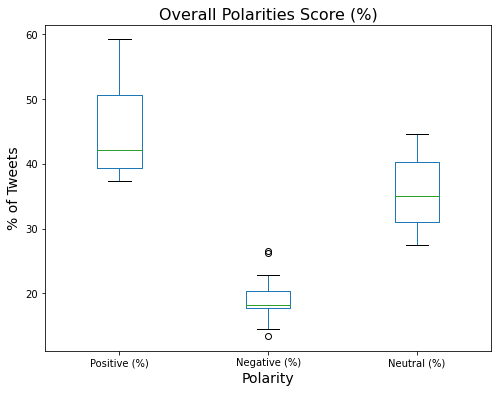

In [19]:
bplot = df_chart.boxplot(column=['por_pos', 'por_neg', 'por_neu'], grid=False, figsize=(8,6))

bplot.axes.set_title("Overall Polarities Score (%)", fontsize=16)
 
bplot.set_xlabel("Polarity", fontsize=14) 
bplot.set_ylabel("% of Tweets", fontsize=14)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['Positive (%)', 'Negative (%)', 'Neutral (%)'])

[Text(1, 0, 'All Polarities'), Text(2, 0, 'Only Positives and Negatives')]

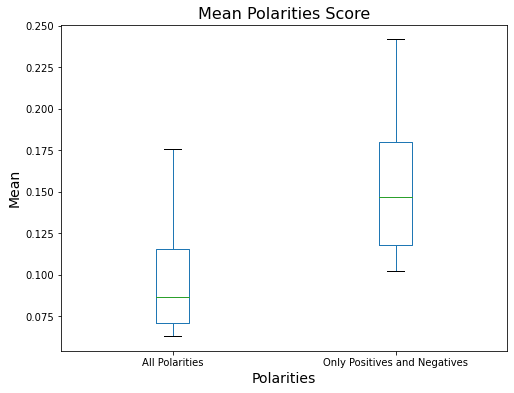

In [20]:
bplot = df_chart.boxplot(column=['mean_all', 'mean_posneg'], grid=False, figsize=(8,6))

bplot.axes.set_title("Mean Polarities Score", fontsize=16)
 
bplot.set_xlabel("Polarities", fontsize=14) 
bplot.set_ylabel("Mean", fontsize=14)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['All Polarities', 'Only Positives and Negatives'])

In [21]:
def plot_point_chart(df, count, id_user):

    first_date = df.iloc[0]['date_minus_time']
    
    for i in range(1,13):
        end_date = first_date + relativedelta(months=+3)
        mask = (df['created_at'] >= first_date) & (df['created_at'] < end_date)
        new_df = df.loc[mask]
        
        fig, ax = plt.subplots(figsize=(24, 8))
    
        x = new_df['date_minus_time']
        y = new_df[alg_to_analyze[0]]

        x_ticks = x

        colors = {'pos':'green', 'neu':'orange', 'neg':'red'}

        plt.yticks(np.arange(-1.0, 1.1, 0.1), fontsize=16)
        plt.xticks(x_ticks, rotation='vertical', fontsize=16)

        date_form = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_form)
        plt.xlabel('Day', fontsize=16)
        plt.ylabel('Polarity OpLexicon Score', fontsize=16)
        
        plt.title('Scatter Plot - OpLexicon - P{}, User {} - From {} To {}'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")), fontsize=20)
        
        plt.rcParams.update({
            "savefig.facecolor": (1.0, 1.0, 1.0)
        })
        
        plt.scatter(x, y, alpha=0.7, c=new_df[alg_to_analyze[1]].map(colors))
        
#         plt.savefig('images/scatter_P{}_U{}_{}_{}.pdf'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")),bbox_inches='tight',transparent=False)
        
        first_date = end_date

In [22]:
count = 1
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    df = pd.DataFrame(tweets_pd)
    clean_df(df)
    
    df = df.sort_values(by='created_at')
    
    df["created_at"] = pd.to_datetime(df["created_at"])
    df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
#     df.set_index(df["date_minus_time"],inplace=True)
    
#     plot_point_chart(df, count, id_user)
    
    count += 1

In [23]:
tweets_pd = create_tweets_pd(data, id_user)
df = pd.DataFrame(tweets_pd)
df.head()

text           created_at  \
0  @mauriciojr Eu usei bastante Eclipse e acho o ...  2021-03-31T23:11:12   
1  Piada a parte, parece um sanduíche meio ruim m...  2021-03-31T20:35:20   
2  Tava querendo um sanduíche, mas acho que esse ...  2021-03-31T20:27:23   
3  O ícone do Slack no Mac mudou de forma tão sut...  2021-03-31T15:03:38   
4  @rochacbruno Caraca, eu tô viciado nessa músic...  2021-03-30T20:39:03   

   id_user  vader_sentiment_analysis_score vader_sentiment_analysis_polarity  \
0       38                          0.7096                               pos   
1       38                         -0.3612                               neg   
2       38                         -0.8807                               neg   
3       38                         -0.4767                               neg   
4       38                          0.2182                               pos   

   oplexicon_sentiment_analysis_score oplexicon_sentiment_analysis_polarity  \
0                            0.250000                                   pos   
1                           -0.250000                                   neg   
2                            0.458831                                   pos   
3                            0.000000                                   neu   
4                           -0.458831                                   neg   

   sentistrength_sentiment_analysis_score  \
0                                0.458831   
1                                0.000000   
2                               -0.250000   
3                               -0.250000   
4                                0.000000   

  sentistrength_sentiment_analysis_polarity  \
0                                       pos   
1                                       neu   
2                                       neg   
3                                       neg   
4                                       neu   

   sentilexpt_sentiment_analysis_score sentilexpt_sentiment_analysis_polarity  \
0                             0.000000                                    neu   
1                            -0.458831                                    neg   
2                             0.000000                                    neu   
3                             0.000000                                    neu   
4                            -0.250000                                    neg   

   final_score final_polarity  
0     0.354608            pos  
1    -0.267508            neg  
2    -0.167967            neg  
3    -0.181675            neg  
4    -0.122658            neg

In [24]:
def plot_point_chart_pos_neg(df, count, id_user):

    first_date = df.index[0]
    
    for i in range(1,13):
        
        fig, ax = plt.subplots(figsize=(24, 8))

        end_date = first_date + relativedelta(months=+3)
        mask = (df.index >= first_date) & (df.index < end_date)
        new_df = df.loc[mask]
        
        x_ticks = new_df.index

        plt.xticks(x_ticks, rotation='vertical', fontsize=16)
        plt.yticks(np.arange(-1.0, 1.1, 0.1), fontsize=16)
        plt.xlabel('Day', fontsize=16)
        plt.ylabel('Polarity Score Mean', fontsize=16)

        date_form = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_form)
    
        x = new_df.index
        y1 = new_df['oplexicon_score_pos']
        y2 = new_df['oplexicon_score_neg']
        y3 = new_df['mean']

        plt.title('Scatter Plot - Polarity Means - VADER - P{}, User {} - From {} To {}'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")), fontsize=20)
        
        plt.rcParams.update({
            "savefig.facecolor": (1.0, 1.0, 1.0)
        })
        
        plt.axhline(y=0.0, color='orange', linestyle='-', alpha=0.7, linewidth=4)
        
#         # plotting the line 1 points 
#         plt.scatter(new_df.index, new_df['final_score_pos'], label = "pos", marker='o', color = 'green')

#         # plotting the line 2 points 
#         plt.scatter(new_df.index, new_df['final_score_neg'], label = "neg", marker='o', color = 'red')
        
        
        # plotting the line 1 points 
        plt.plot(new_df.index, new_df['oplexicon_score_pos'], label = "pos", marker='o', markerfacecolor='none', color = 'green')

        # plotting the line 2 points 
        plt.plot(new_df.index, new_df['oplexicon_score_neg'], label = "neg", marker='o', markerfacecolor='none', color = 'red')
        
        # plotting the line 3 points 
        plt.plot(new_df.index, new_df['mean'], label = "mean", marker='o', markerfacecolor='none', color = 'gray', linestyle='--')
        
#         plt.legend()
        
#         plt.savefig('images/scatter_pol_means_P{}_U{}_{}_{}.pdf'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")),bbox_inches='tight',transparent=False)
        
        plt.show()
        
        first_date = end_date

In [25]:
count = 1
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    df = pd.DataFrame(tweets_pd)
    clean_df(df)
    
    df = df.sort_values(by='created_at')
    
    df["created_at"] = pd.to_datetime(df["created_at"])
    df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
    df.set_index(df["date_minus_time"],inplace=True)
    
    df_pos = df.query(alg_to_analyze[1] + " == 'pos'")
    df_pos = pd.DataFrame(df_pos[alg_to_analyze[0]].resample('D').mean())
    
    df_neg = df.query(alg_to_analyze[1] + " == 'neg'")
    df_neg = pd.DataFrame(df_neg[alg_to_analyze[0]].resample('D').mean())
    
    df_final = pd.merge(df_pos, df_neg, how="outer", on=["date_minus_time"])
    df_final = df_final.fillna(0)
    df_final.columns = ['oplexicon_score_pos', 'oplexicon_score_neg']
    
    df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)
    
#     plot_point_chart_pos_neg(df_final, count, id_user)
    
    count += 1

In [26]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

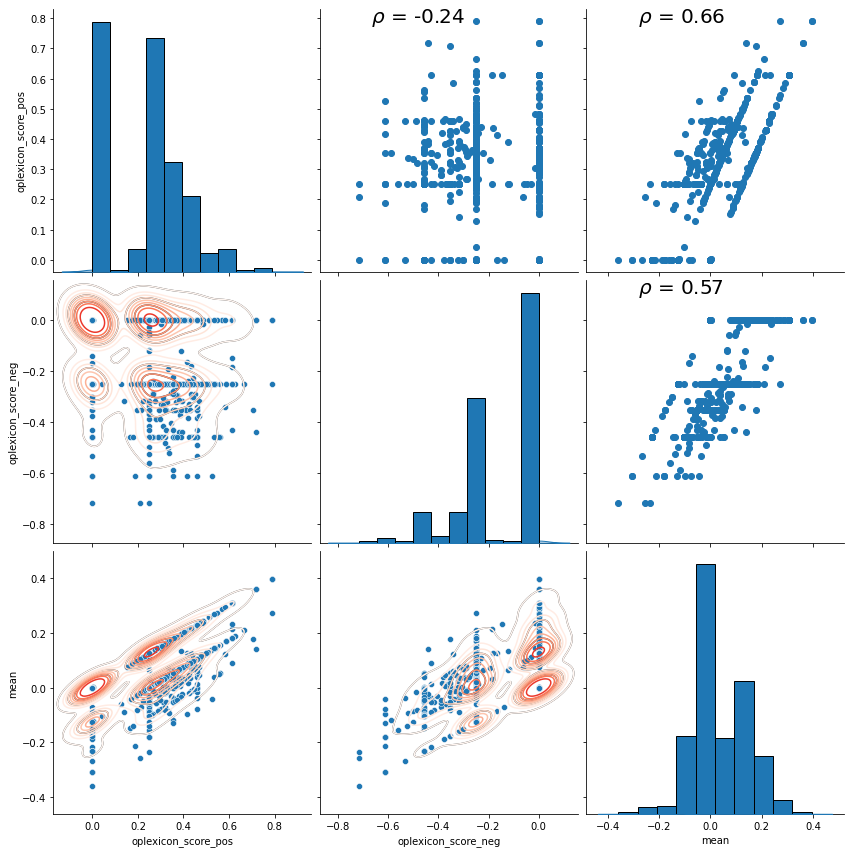

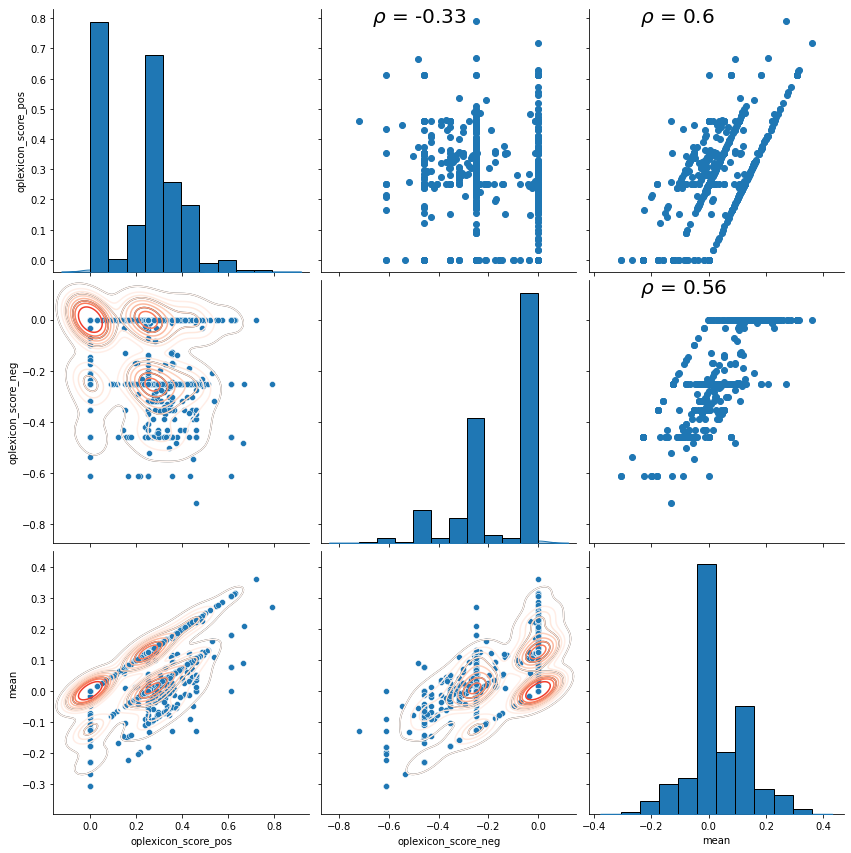

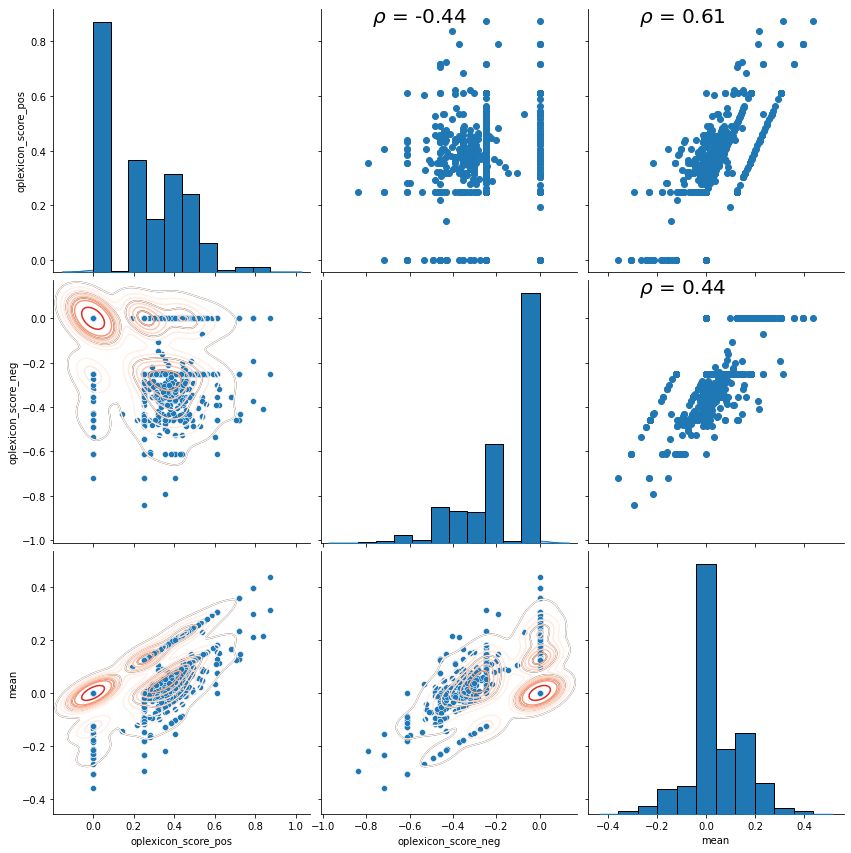

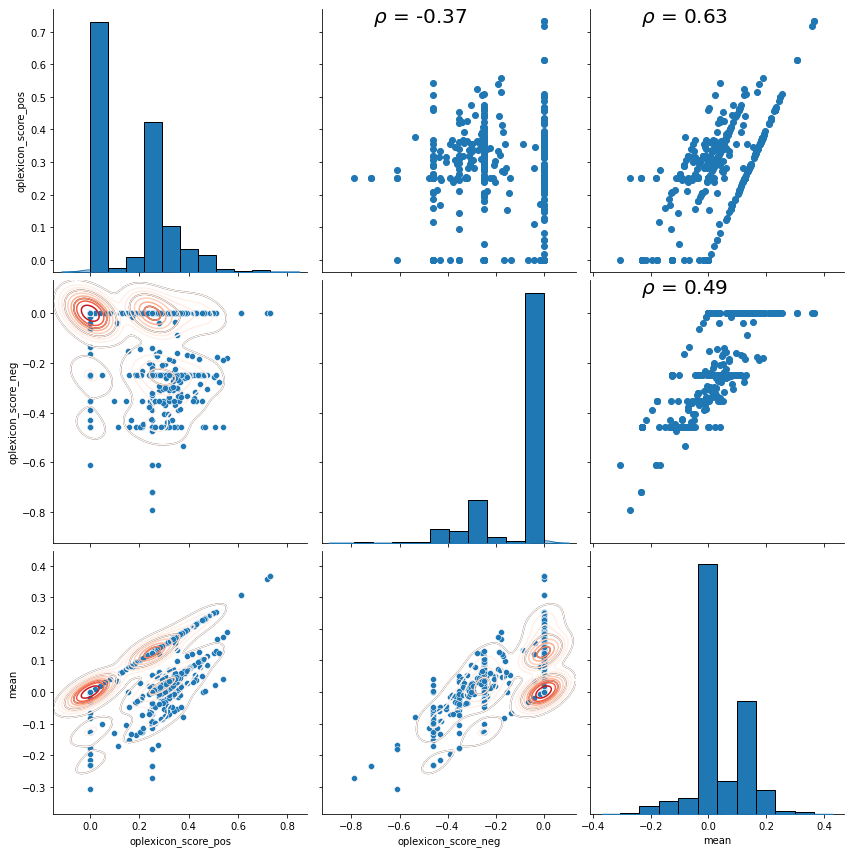

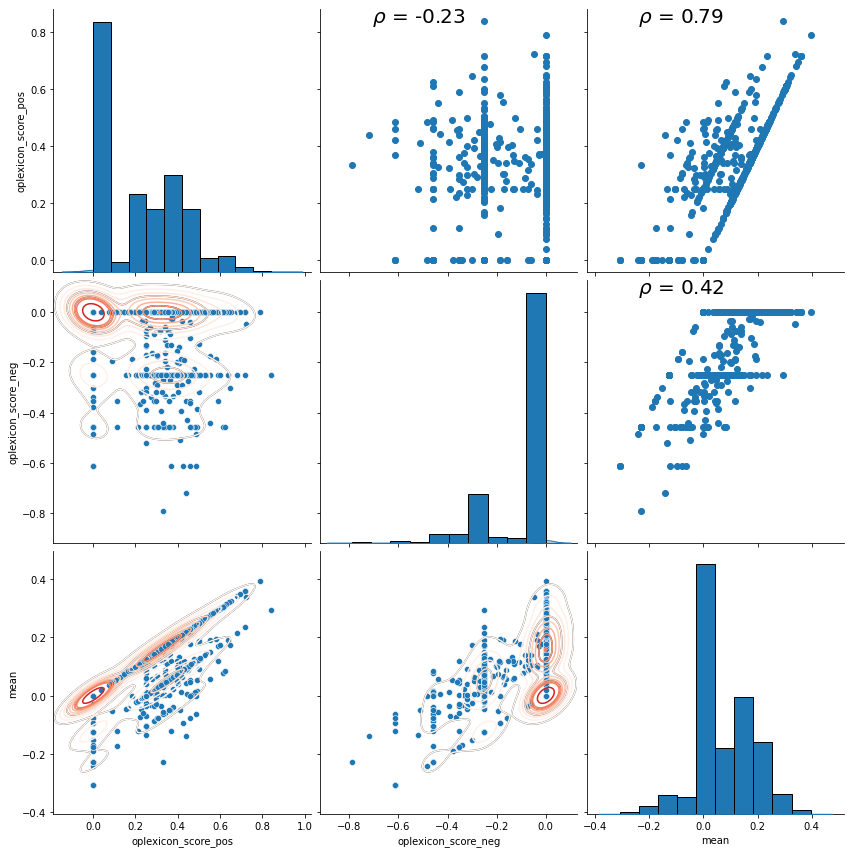

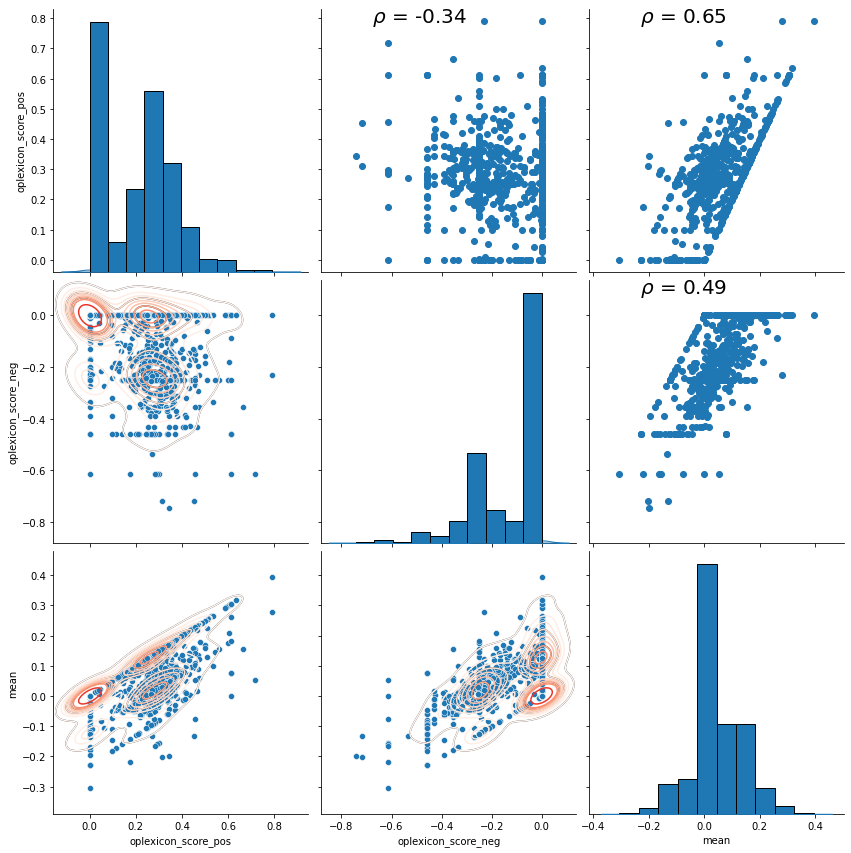

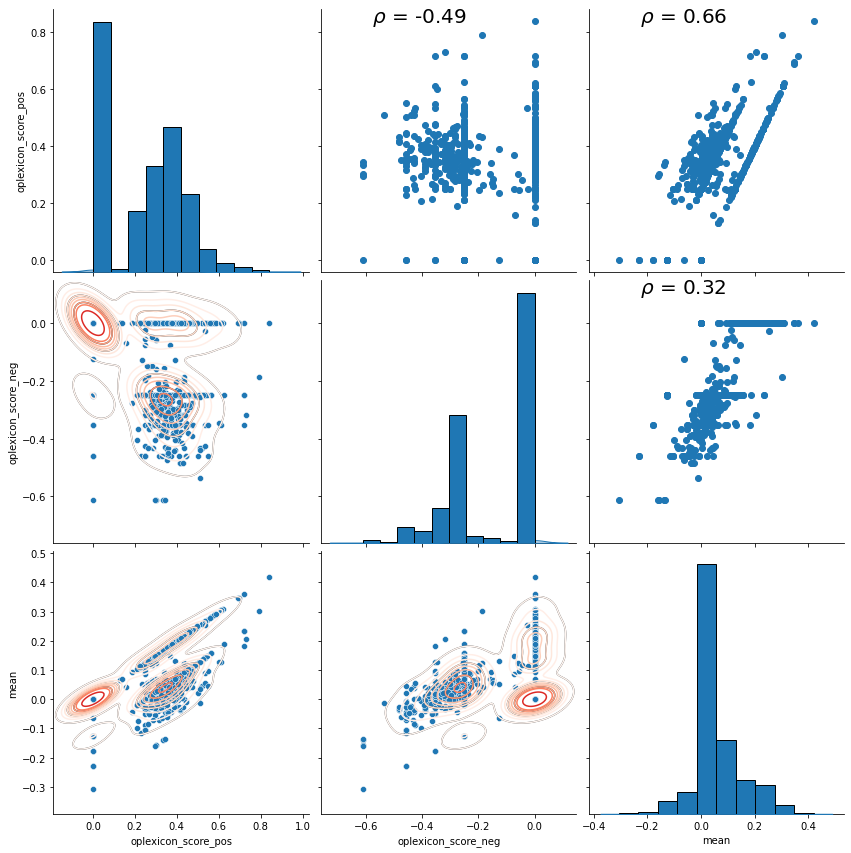

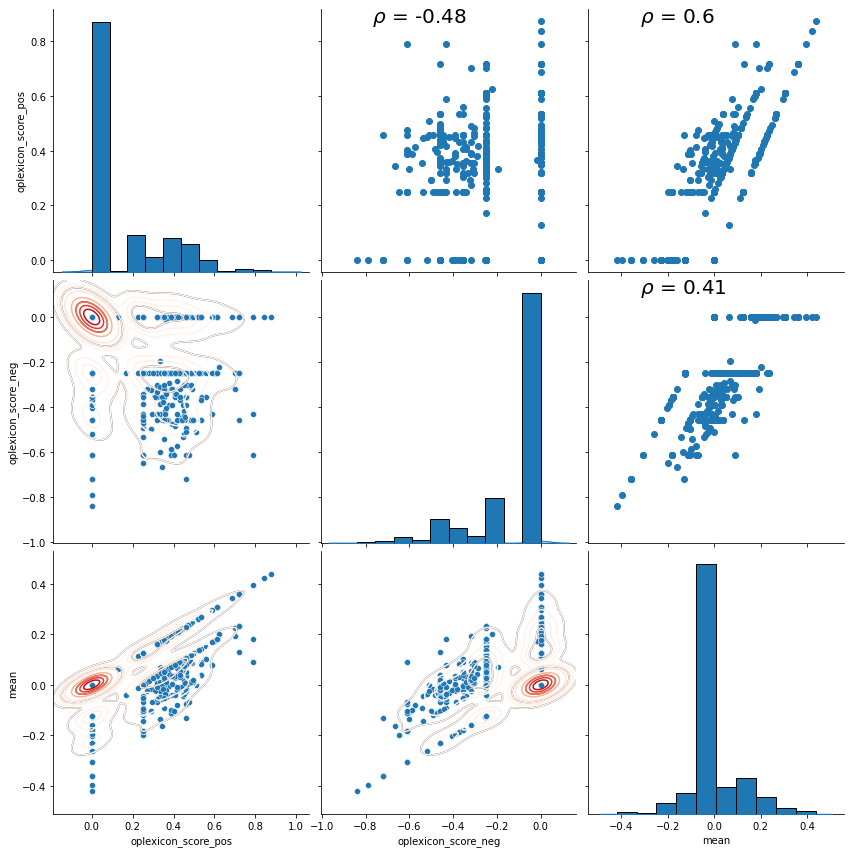

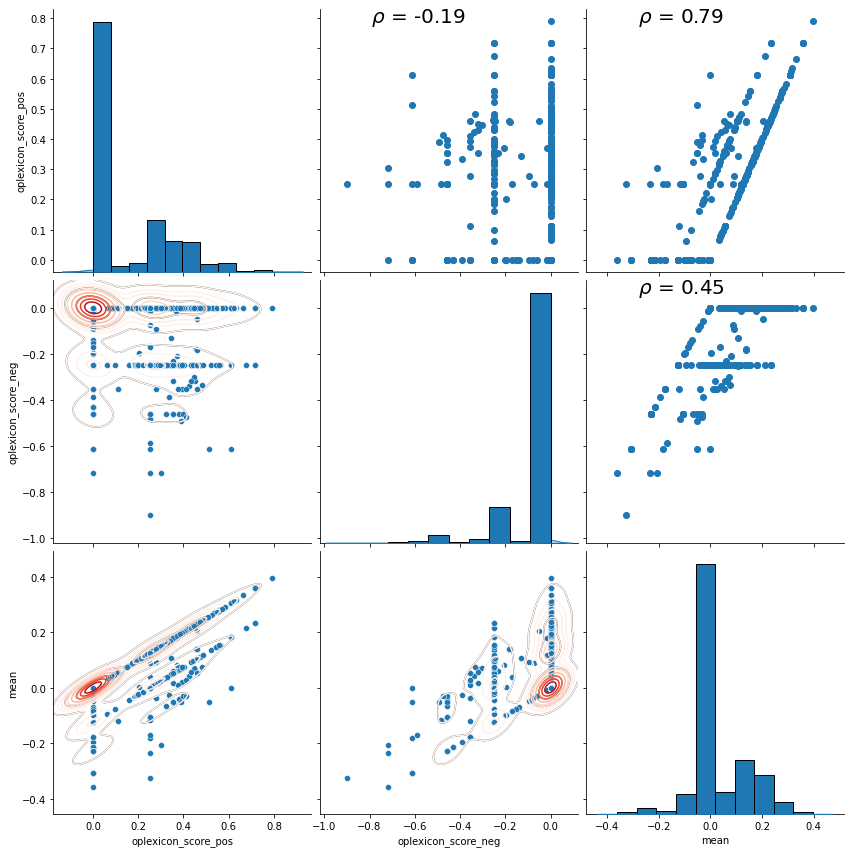

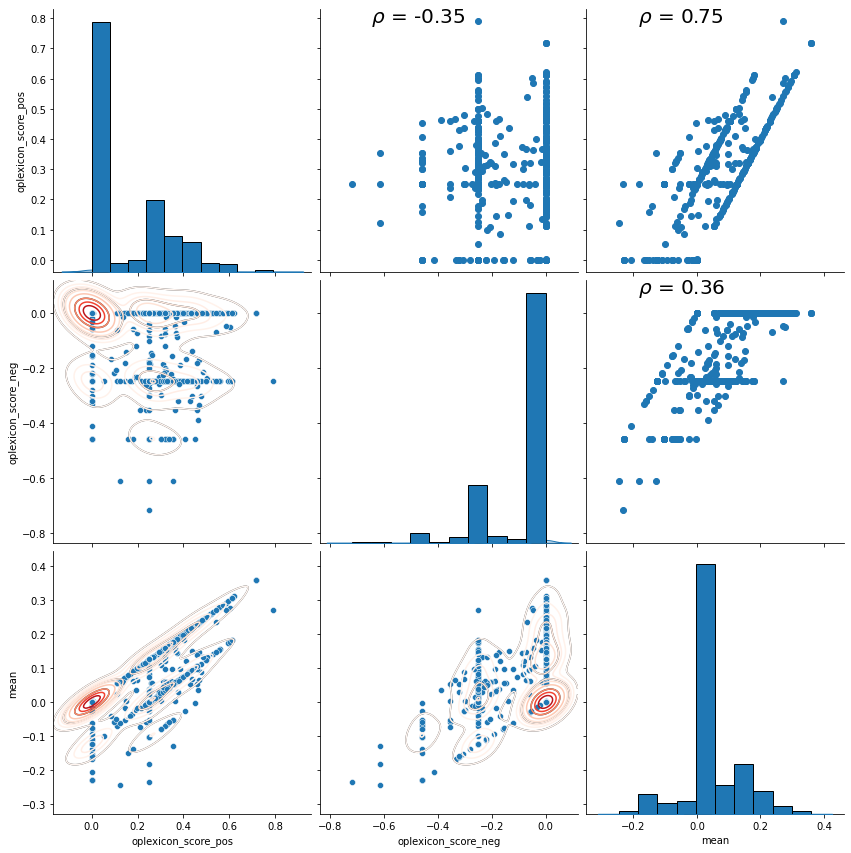

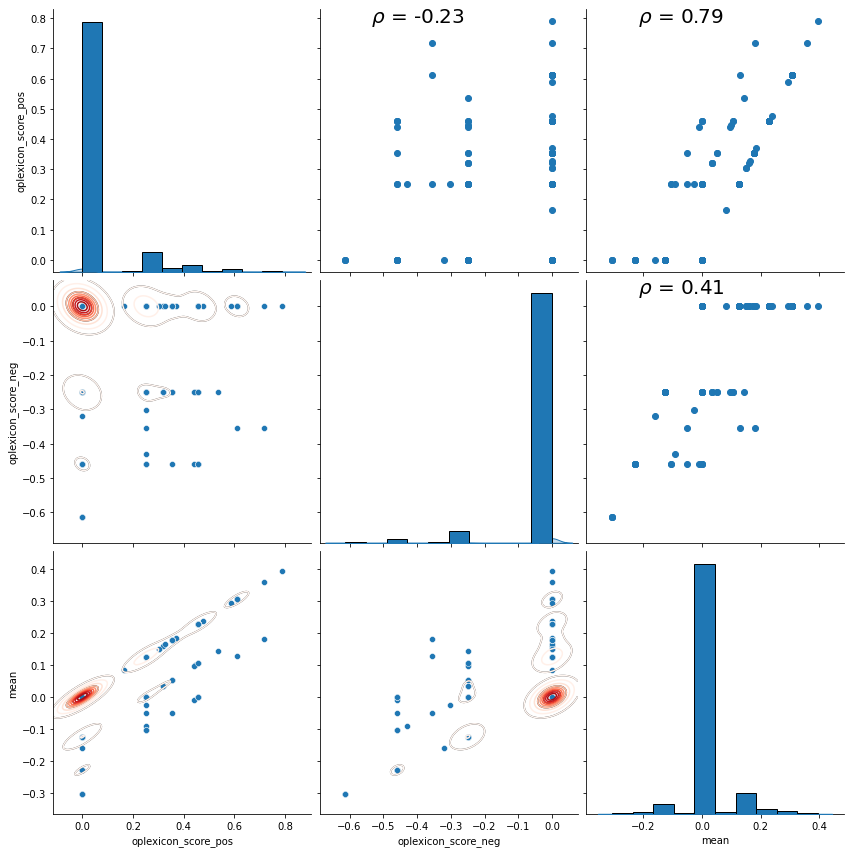

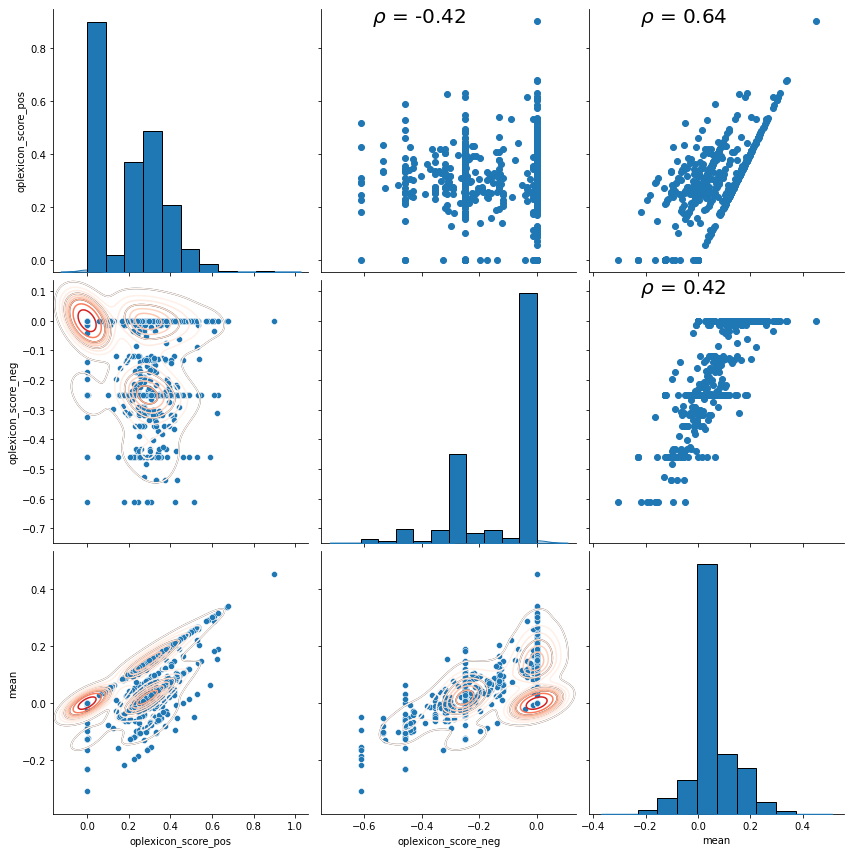

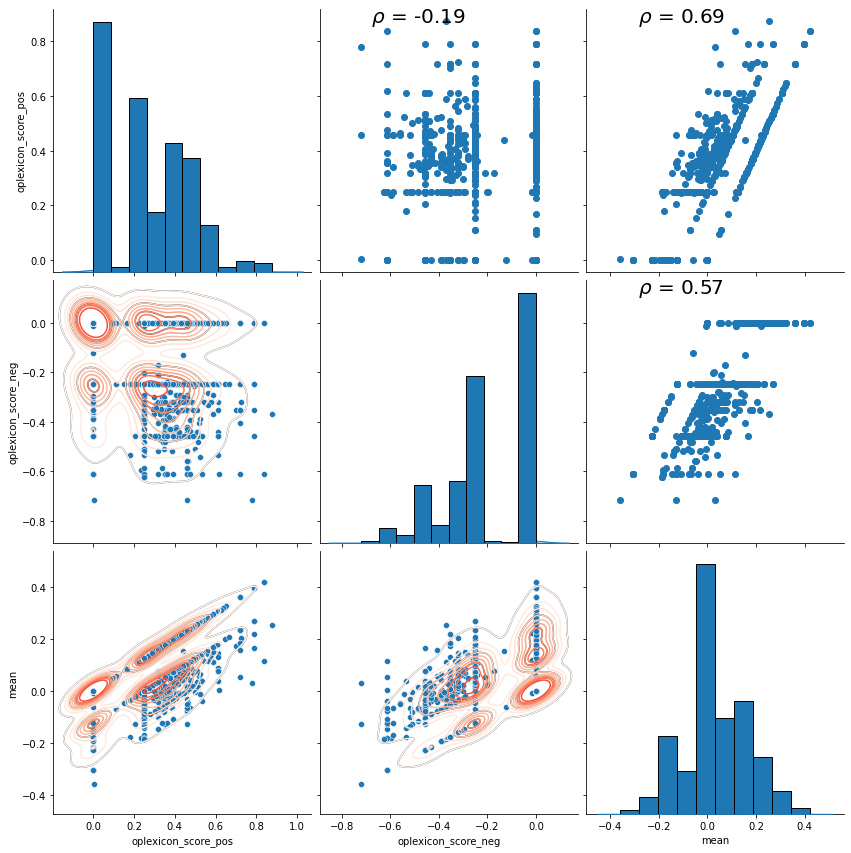

In [27]:
count = 1
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    df = pd.DataFrame(tweets_pd)
    
    clean_df(df)

    df = df.sort_values(by='created_at')

    df["created_at"] = pd.to_datetime(df["created_at"])
    df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
    df.set_index(df["date_minus_time"],inplace=True)

    df_pos = df.query(alg_to_analyze[1] + " == 'pos'")
    df_pos = pd.DataFrame(df_pos[alg_to_analyze[0]].resample('D').mean())

    df_neg = df.query(alg_to_analyze[1] + " == 'neg'")
    df_neg = pd.DataFrame(df_neg[alg_to_analyze[0]].resample('D').mean())

    df_final = pd.merge(df_pos, df_neg, how="outer", on=["date_minus_time"])
    df_final = df_final.fillna(0)
    df_final.columns = ['oplexicon_score_pos', 'oplexicon_score_neg']

    df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)

    g = sns.pairplot(df_final, diag_kind="kde", height=4)
    g.map_lower(sns.kdeplot, levels=4, color=".2")

    # Map the plots to the locations
    g = g.map_upper(plt.scatter)
    g = g.map_upper(corr)
    g = g.map_lower(sns.kdeplot, cmap = 'Reds')
    g = g.map_diag(plt.hist, bins = 10, edgecolor =  'k');
    
    count += 1

In [28]:
df_final

oplexicon_score_pos  oplexicon_score_neg      mean
date_minus_time                                                    
2018-04-01                  0.430190            -0.250000  0.090095
2018-04-02                  0.250000            -0.250000  0.000000
2018-04-03                  0.840168            -0.612372  0.113898
2018-04-04                  0.354415            -0.354415  0.000000
2018-04-05                  0.250000            -0.250000  0.000000
...                              ...                  ...       ...
2021-03-27                  0.000000            -0.458831 -0.229415
2021-03-28                  0.000000             0.000000  0.000000
2021-03-29                  0.354415             0.000000  0.177208
2021-03-30                  0.000000            -0.458831 -0.229415
2021-03-31                  0.354415            -0.250000  0.052208

[1096 rows x 3 columns]

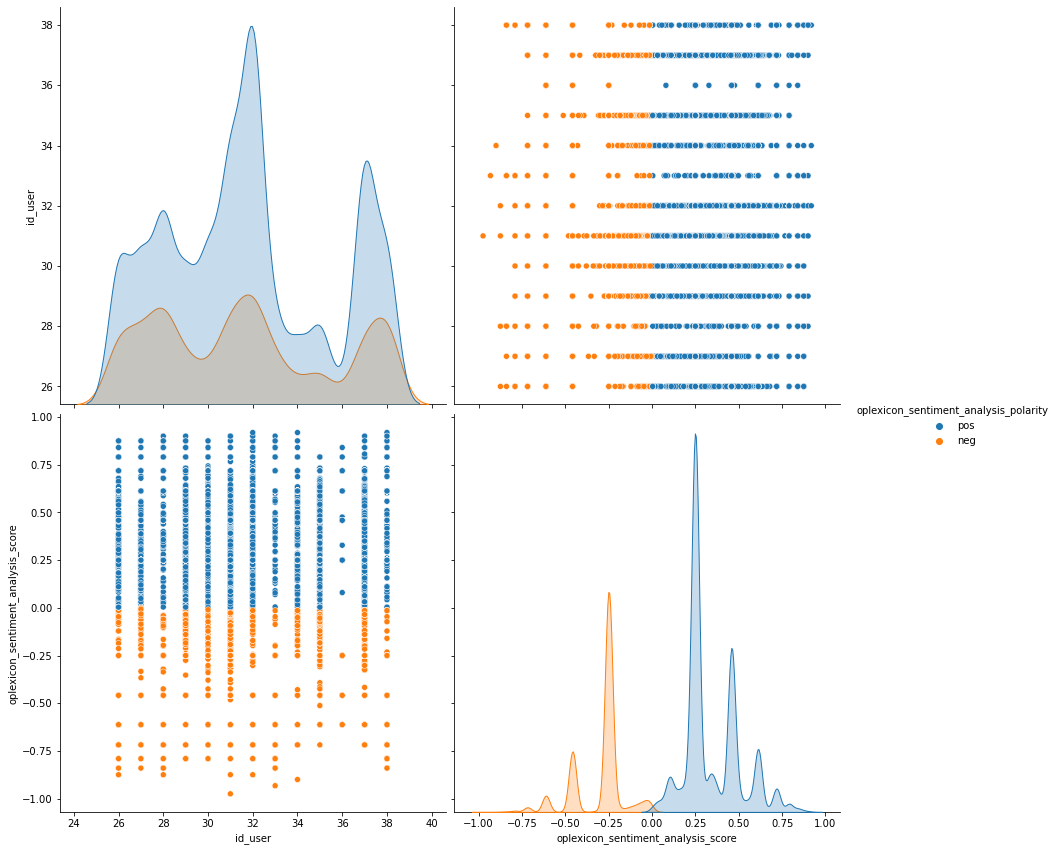

In [29]:
tweets = [data[d]['tweets'] for d in data]

final_tweets = []
for i in tweets:
    final_tweets.extend(i)

df = pd.DataFrame(final_tweets)

del df[0]
del df[1]
del df[4]
del df[5]
del df[6]
del df[18]

df.columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]

clean_df(df)

df = df.sort_values(by='created_at')

# print(df)

df["created_at"] = pd.to_datetime(df["created_at"])
df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
# df.set_index(df["date_minus_time"],inplace=True)

df_final = df.query(alg_to_analyze[1] + " == 'pos' or "+ alg_to_analyze[1] + " == 'neg'")

# df_pos = pd.DataFrame(df_pos['final_score'].resample('D').mean())
# df_pos['final_score_mean'] = df_pos['final_score'].resample('D').mean()

# print(df_pos)


# df_neg = df.query("final_polarity == 'neg'")
# df_neg = pd.DataFrame(df_neg['final_score'].resample('D').mean())

# df_final = pd.merge(df_pos, df_neg, how="outer", on=["date_minus_time"])
# df_final = df_final.fillna(0)
# df_final.columns = ['final_score_pos', 'final_score_neg']

# df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)

# df_final.head()

sns.pairplot(df_final, diag_kind="kde", height=6, hue=alg_to_analyze[1])

Text(0.5, 1.02, 'PairPlot')

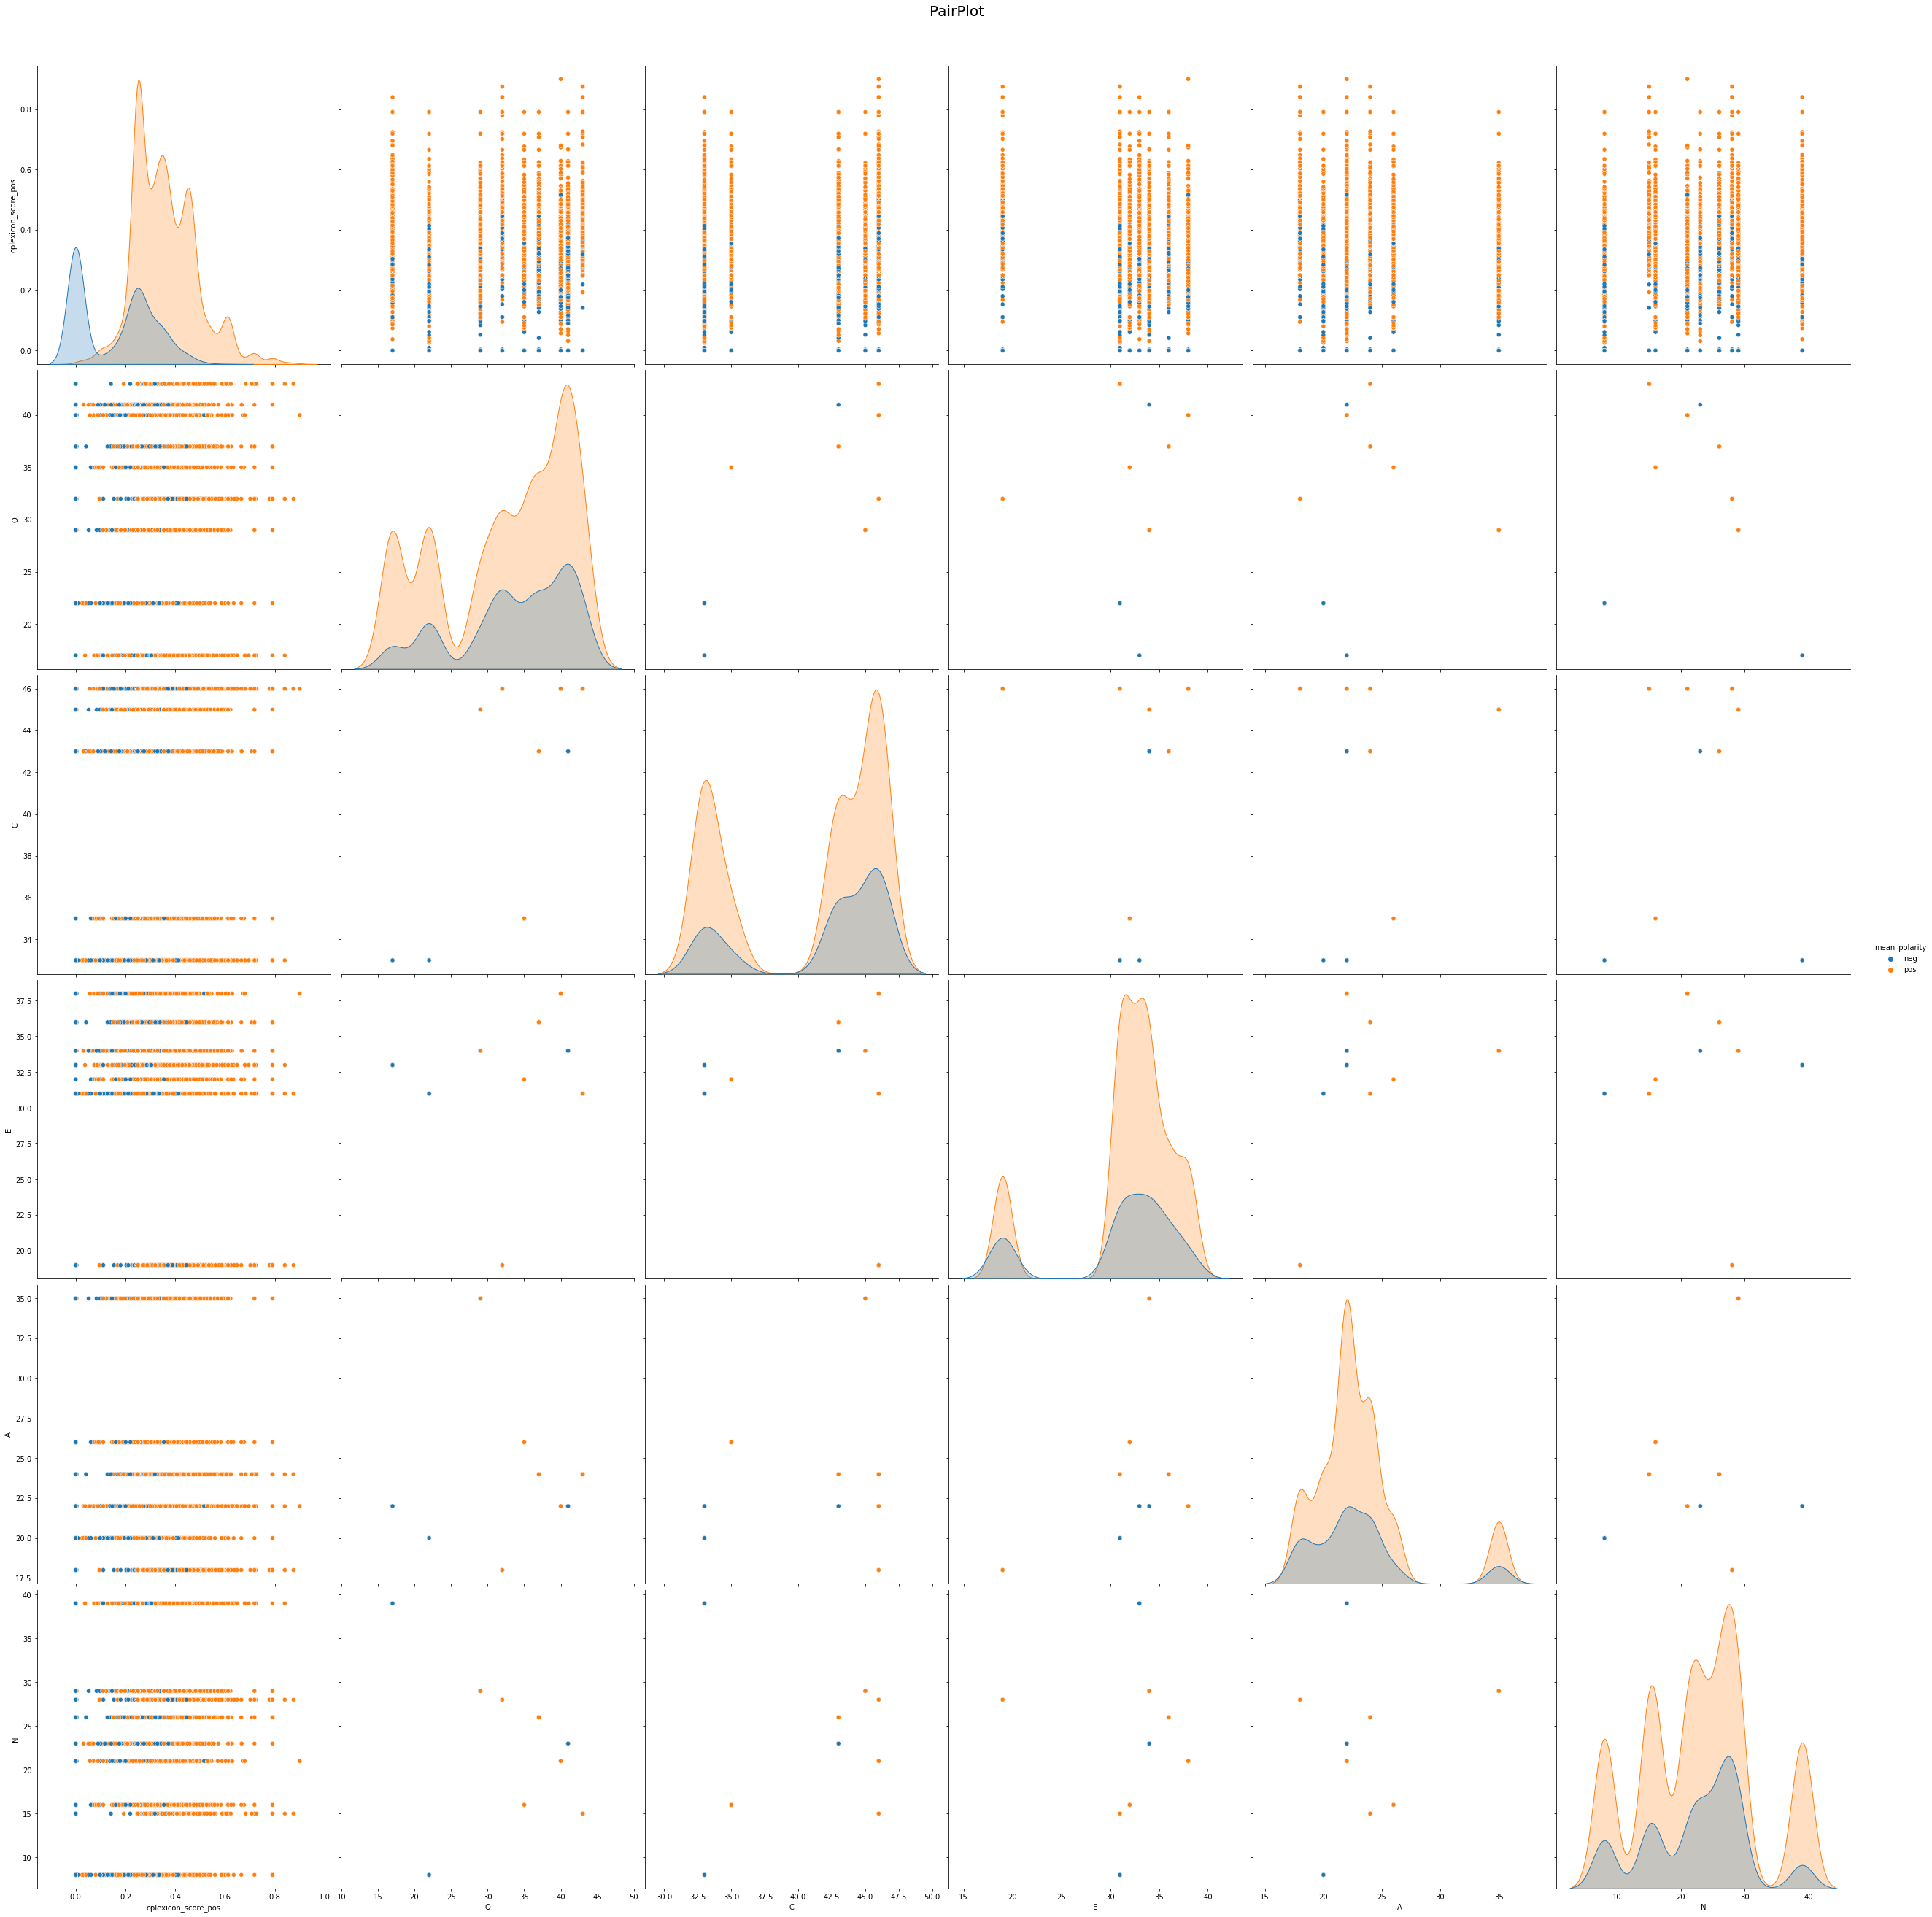

In [30]:
frames = []

count = 1
for c in data:
    id_user = c
    
    df_bf = pd.DataFrame(data[id_user]['bigfive'])
    
    if df_bf.empty == False:
        tweets_pd = create_tweets_pd(data, id_user)
        df = pd.DataFrame(tweets_pd)

        clean_df(df)

        df = df.sort_values(by='created_at')

        df["created_at"] = pd.to_datetime(df["created_at"])
        df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
        df.set_index(df["date_minus_time"],inplace=True)

        df_pos = df.query(alg_to_analyze[1] + " == 'pos'")

        df_pos = pd.DataFrame(df_pos[alg_to_analyze[0]].resample('D').mean())

        df_neg = df.query(alg_to_analyze[1] + " == 'neg'")
        df_neg = pd.DataFrame(df_neg[alg_to_analyze[0]].resample('D').mean())

        df_final = pd.merge(df_pos, df_neg, how="outer", on=["date_minus_time"])
        df_final = df_final.fillna(0)
        df_final.columns = ['oplexicon_score_pos', 'oplexicon_score_neg']

        df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)
        df_final.loc[df_final['mean'] > 0, ['mean_polarity']] = 'pos'
        df_final.loc[df_final['mean'] < 0, ['mean_polarity']] = 'neg'

    #     df_final = df_final.drop(df_final["mean_polarity"])
        df_final = df_final.dropna(how = 'any')

        df_final['id_user'] = id_user
        
        df_final['O'] = int(bigfive[id_user]['O'])
        df_final['C'] = int(bigfive[id_user]['C'])
        df_final['E'] = int(bigfive[id_user]['E'])
        df_final['A'] = int(bigfive[id_user]['A'])
        df_final['N'] = int(bigfive[id_user]['N'])

    #     g = sns.pairplot(df_final, diag_kind="kde", height=4)

        count += 1
        
        frames.append(df_final)

#         g = sns.pairplot(df_final, diag_kind="kde", height=6, hue="mean_polarity")
#         g.fig.suptitle("PairPlot - P{} - U{}".format(count, id_user), fontsize=20, y=1.02) # y= some height>1
    #     g.map_lower(sns.kdeplot, levels=4, color=".2")

    #     # Map the plots to the locations
    #     g = g.map_upper(plt.scatter)
    #     g = g.map_upper(corr)
    #     g = g.map_lower(sns.kdeplot)
    #     g = g.map_diag(plt.hist, bins = 10, edgecolor =  'k');

    
result = pd.concat(frames)

# print(result)

# print(result.loc[result['mean_polarity'] == 'neg'])

g = sns.pairplot(result, diag_kind="kde", height=6, hue="mean_polarity", vars=['oplexicon_score_pos', 
                                                                            'O',
                                                                            'C',
                                                                            'E',
                                                                            'A',
                                                                            'N'
                                                                              ])
g.fig.suptitle("PairPlot", fontsize=20, y=1.02) # y= some height>1

In [31]:
ids = result['id_user'].unique()
bf = ['O', 'C', 'E', 'A', 'N']

for b in bf:
    df_chart[b] = 0

for i in ids:
    for b in bf:
        df_chart.loc[df_chart['id_user'] == i, b] = int(bigfive[i][b])
        
        
df_chart

id_user   pos   neu   neg    por_pos    por_neu    por_neg  mean_all  \
0        26  1884  2173   982  37.388371  43.123636  19.487994  0.067120   
1        27  1792  1832   925  39.393273  40.272587  20.334139  0.063015   
2        28  2401  2182  1350  40.468566  36.777347  22.754087  0.079176   
3        29  1584  1172   593  47.297701  34.995521  17.706778  0.095408   
4        30  1878   869   425  59.205549  27.395965  13.398487  0.175408   
5        31  3114  1709  1173  51.934623  28.502335  19.563042  0.106356   
6        32  4925  2750  1499  53.684325  29.976019  16.339656  0.146175   
7        33   983   737   611  42.170742  31.617332  26.211926  0.069913   
8        34   783   480   282  50.679612  31.067961  18.252427  0.124757   
9        35  1021  1109   465  39.344894  42.736031  17.919075  0.086705   
10       36   175   209    84  37.393162  44.658120  17.948718  0.072440   
11       37  3218  2306   932  49.845105  35.718711  14.436183  0.115668   
12       38  1956  1504  1248  41.546304  31.945624  26.508071  0.070740   

    mean_posneg   O   C   E   A   N  
0      0.118010  37  43  36  24  26  
1      0.105505  41  43  34  22  23  
2      0.125234  43  46  31  24  15  
3      0.146772   0   0   0   0   0  
4      0.241596  17  33  33  22  39  
5      0.148755  22  33  31  20   8  
6      0.208750   0   0   0   0   0  
7      0.102237   0   0   0   0   0  
8      0.180985  35  35  32  26  16  
9      0.151412  29  45  34  35  29  
10     0.130896   0   0   0   0   0  
11     0.179941  40  46  38  22  21  
12     0.103946  32  46  19  18  28

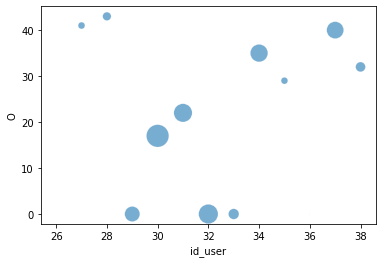

In [32]:

sns.scatterplot(data=df_chart, x="id_user", y="O", 
                size='por_pos', 
                legend=False, 
                sizes=(0, 500),
                cmap="Accent",
                alpha=0.6)


plt.show()

In [33]:
df_chart = df_chart.drop(df_chart[df_chart['O'] == 0].index)
df_chart

id_user   pos   neu   neg    por_pos    por_neu    por_neg  mean_all  \
0        26  1884  2173   982  37.388371  43.123636  19.487994  0.067120   
1        27  1792  1832   925  39.393273  40.272587  20.334139  0.063015   
2        28  2401  2182  1350  40.468566  36.777347  22.754087  0.079176   
4        30  1878   869   425  59.205549  27.395965  13.398487  0.175408   
5        31  3114  1709  1173  51.934623  28.502335  19.563042  0.106356   
8        34   783   480   282  50.679612  31.067961  18.252427  0.124757   
9        35  1021  1109   465  39.344894  42.736031  17.919075  0.086705   
11       37  3218  2306   932  49.845105  35.718711  14.436183  0.115668   
12       38  1956  1504  1248  41.546304  31.945624  26.508071  0.070740   

    mean_posneg   O   C   E   A   N  
0      0.118010  37  43  36  24  26  
1      0.105505  41  43  34  22  23  
2      0.125234  43  46  31  24  15  
4      0.241596  17  33  33  22  39  
5      0.148755  22  33  31  20   8  
8      0.180985  35  35  32  26  16  
9      0.151412  29  45  34  35  29  
11     0.179941  40  46  38  22  21  
12     0.103946  32  46  19  18  28

In [34]:
pos_list = df_chart['pos'].tolist()
o_list = df_chart['O'].tolist()
c_list = df_chart['C'].tolist()
e_list = df_chart['E'].tolist()
a_list = df_chart['A'].tolist()
n_list = df_chart['N'].tolist()

print('pos: mean=%.3f stdv=%.3f' % (np.mean(pos_list), np.std(pos_list)))
print('o: mean=%.3f stdv=%.3f' % (np.mean(o_list), np.std(o_list)))
print('c: mean=%.3f stdv=%.3f' % (np.mean(c_list), np.std(c_list)))
print('e: mean=%.3f stdv=%.3f' % (np.mean(e_list), np.std(e_list)))
print('a: mean=%.3f stdv=%.3f' % (np.mean(a_list), np.std(a_list)))
print('n: mean=%.3f stdv=%.3f' % (np.mean(n_list), np.std(n_list)))

r = np.corrcoef(pos_list, o_list)
print('r x o', r)
r = np.corrcoef(pos_list, c_list)
print('r x c', r)
r = np.corrcoef(pos_list, e_list)
print('r x e', r)
r = np.corrcoef(pos_list, a_list)
print('r x a', r)
r = np.corrcoef(pos_list, n_list)
print('r x n', r)

print('pearsonr pos x o: ',scipy.stats.pearsonr(pos_list, o_list))    # Pearson's r
print('pearsonr pos x c: ',scipy.stats.pearsonr(pos_list, c_list))    # Pearson's r
print('pearsonr pos x e: ',scipy.stats.pearsonr(pos_list, e_list))    # Pearson's r
print('pearsonr pos x a: ',scipy.stats.pearsonr(pos_list, a_list))    # Pearson's r
print('pearsonr pos x n: ',scipy.stats.pearsonr(pos_list, n_list))    # Pearson's r
print('spearmanr pos x o: ',scipy.stats.spearmanr(pos_list, o_list))   # Spearman's rho
print('spearmanr pos x c: ',scipy.stats.spearmanr(pos_list, c_list))   # Spearman's rho
print('spearmanr pos x e: ',scipy.stats.spearmanr(pos_list, e_list))   # Spearman's rho
print('spearmanr pos x a: ',scipy.stats.spearmanr(pos_list, a_list))   # Spearman's rho
print('spearmanr pos x n: ',scipy.stats.spearmanr(pos_list, n_list))   # Spearman's rho
print('kendalltau pos x o: ',scipy.stats.kendalltau(pos_list, o_list))  # Kendall's tau
print('kendalltau pos x c: ',scipy.stats.kendalltau(pos_list, c_list))  # Kendall's tau
print('kendalltau pos x e: ',scipy.stats.kendalltau(pos_list, e_list))  # Kendall's tau
print('kendalltau pos x a: ',scipy.stats.kendalltau(pos_list, a_list))  # Kendall's tau
print('kendalltau pos x n: ',scipy.stats.kendalltau(pos_list, n_list))  # Kendall's tau

pos: mean=2005.222 stdv=774.464
o: mean=32.889 stdv=8.346
c: mean=41.111 stdv=5.405
e: mean=32.000 stdv=5.077
a: mean=23.667 stdv=4.570
n: mean=22.778 stdv=8.612
r x o [[1.         0.02814427]
 [0.02814427 1.        ]]
r x c [[1.         0.07092379]
 [0.07092379 1.        ]]
r x e [[1.         0.09621678]
 [0.09621678 1.        ]]
r x a [[ 1.         -0.60129625]
 [-0.60129625  1.        ]]
r x n [[ 1.         -0.37012619]
 [-0.37012619  1.        ]]
pearsonr pos x o:  (0.02814427393396779, 0.9427027883767545)
pearsonr pos x c:  (0.07092378793237811, 0.8561195295868512)
pearsonr pos x e:  (0.09621678216866408, 0.8054946607500945)
pearsonr pos x a:  (-0.6012962478659076, 0.08676015383213766)
pearsonr pos x n:  (-0.3701261920370314, 0.32684553925066345)
spearmanr pos x o:  SpearmanrResult(correlation=0.16666666666666669, pvalue=0.668231040071504)
spearmanr pos x c:  SpearmanrResult(correlation=0.3419927840283847, pvalue=0.3676791124519518)
spearmanr pos x e:  SpearmanrResult(correlation=

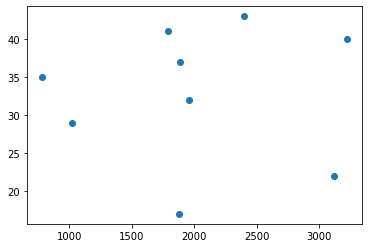

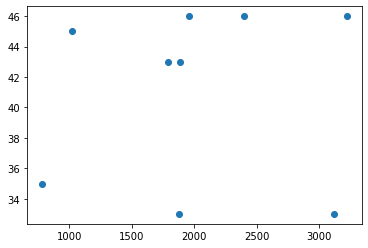

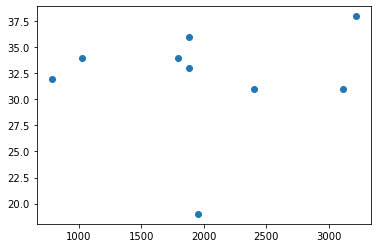

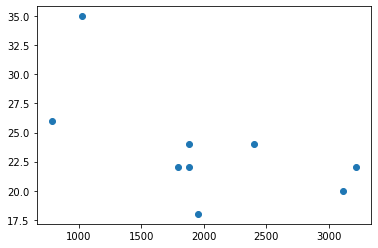

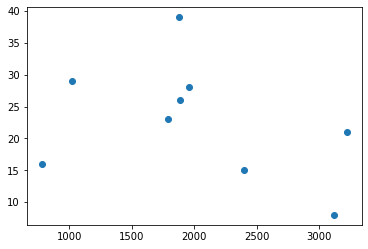

In [35]:
plt.scatter(pos_list, o_list)
plt.show()

plt.scatter(pos_list, c_list)
plt.show()

plt.scatter(pos_list, e_list)
plt.show()

plt.scatter(pos_list, a_list)
plt.show()

plt.scatter(pos_list, n_list)
plt.show()

In [36]:
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, o_list)
o_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, c_list)
c_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, e_list)
e_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, a_list)
a_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, n_list)
n_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'


print('o x pos: ',o_line)
print('c x pos: ',c_line)
print('e x pos: ',e_line)
print('a x pos: ',a_line)
print('n x pos: ',n_line)

o x pos:  Regression line: y=32.28+0.00x, r=0.03
c x pos:  Regression line: y=40.12+0.00x, r=0.07
e x pos:  Regression line: y=30.74+0.00x, r=0.10
a x pos:  Regression line: y=30.78+-0.00x, r=-0.60
n x pos:  Regression line: y=31.03+-0.00x, r=-0.37


In [37]:
pg.corr(x=df_chart['pos'], y=df_chart['A'])

n         r        CI95%        r2    adj_r2    p-val   BF10  \
pearson  9 -0.601296  [-0.9, 0.1]  0.361557  0.148743  0.08676  1.472   

            power  
pearson  0.430613

In [38]:
pg.pairwise_corr(df_chart).sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']].head()

X            Y  n         r     p-unc
70  mean_all  mean_posneg  9  0.979674  0.000004
48   por_pos     mean_all  9  0.943839  0.000131
49   por_pos  mean_posneg  9  0.875898  0.001960
46   por_pos      por_neu  9 -0.853195  0.003447
64   por_neg  mean_posneg  9 -0.836981  0.004892

In [39]:
corr_pos = pg.pairwise_corr(df_chart, columns=[['pos'],['O', 'C', 'E', 'A', 'N']])
corr_pos

X  Y   method       tail  n         r          CI95%        r2    adj_r2  \
0  pos  O  pearson  two-sided  9  0.028144  [-0.65, 0.68]  0.000792 -0.332277   
1  pos  C  pearson  two-sided  9  0.070924   [-0.62, 0.7]  0.005030 -0.326626   
2  pos  E  pearson  two-sided  9  0.096217  [-0.61, 0.71]  0.009258 -0.320990   
3  pos  A  pearson  two-sided  9 -0.601296    [-0.9, 0.1]  0.361557  0.148743   
4  pos  N  pearson  two-sided  9 -0.370126  [-0.83, 0.39]  0.136993 -0.150675   

          z     p-unc   BF10     power  
0  0.028152  0.942703  0.407  0.049456  
1  0.071043  0.856120  0.412  0.052718  
2  0.096515  0.805495  0.417  0.056003  
3 -0.695175  0.086760  1.472  0.430613  
4 -0.388569  0.326846  0.623  0.169614

In [40]:
corr_neg = pg.pairwise_corr(df_chart, columns=[['neg'],['O', 'C', 'E', 'A', 'N']])
corr_neg

X  Y   method       tail  n         r          CI95%        r2    adj_r2  \
0  neg  O  pearson  two-sided  9  0.364703   [-0.4, 0.83]  0.133008 -0.155989   
1  neg  C  pearson  two-sided  9  0.450975   [-0.3, 0.86]  0.203378 -0.062163   
2  neg  E  pearson  two-sided  9 -0.362118   [-0.83, 0.4]  0.131130 -0.158494   
3  neg  A  pearson  two-sided  9 -0.565861  [-0.89, 0.16]  0.320198  0.093598   
4  neg  N  pearson  two-sided  9 -0.415740  [-0.85, 0.34]  0.172840 -0.102880   

          z     p-unc   BF10     power  
0  0.382300  0.334534  0.614  0.165656  
1  0.485923  0.223090  0.784  0.239287  
2 -0.379322  0.338229  0.611  0.163799  
3 -0.641413  0.112257  1.232  0.377610  
4 -0.442531  0.265759  0.703  0.206370

In [41]:
corr_mean_pn = pg.pairwise_corr(df_chart, columns=[['mean_posneg'],['O', 'C', 'E', 'A', 'N']])
corr_mean_pn

X  Y   method       tail  n         r          CI95%        r2  \
0  mean_posneg  O  pearson  two-sided  9 -0.591019   [-0.9, 0.12]  0.349304   
1  mean_posneg  C  pearson  two-sided  9 -0.615170  [-0.91, 0.08]  0.378434   
2  mean_posneg  E  pearson  two-sided  9  0.354066  [-0.41, 0.82]  0.125363   
3  mean_posneg  A  pearson  two-sided  9  0.119134  [-0.59, 0.73]  0.014193   
4  mean_posneg  N  pearson  two-sided  9  0.333379  [-0.42, 0.82]  0.111142   

     adj_r2         z     p-unc   BF10     power  
0  0.132405 -0.679231  0.093745  1.395  0.414727  
1  0.171246 -0.717197  0.077854  1.588  0.452721  
2 -0.166183  0.370085  0.349869  0.599  0.158136  
3 -0.314409  0.119703  0.760153  0.424  0.059877  
4 -0.185144  0.346625  0.380644  0.572  0.144405

In [42]:
corr_mean_all = pg.pairwise_corr(df_chart, columns=[['mean_all'],['O', 'C', 'E', 'A', 'N']])
corr_mean_all

X  Y   method       tail  n         r           CI95%        r2  \
0  mean_all  O  pearson  two-sided  9 -0.651974   [-0.92, 0.02]  0.425070   
1  mean_all  C  pearson  two-sided  9 -0.702489  [-0.93, -0.07]  0.493490   
2  mean_all  E  pearson  two-sided  9  0.212964   [-0.53, 0.77]  0.045354   
3  mean_all  A  pearson  two-sided  9 -0.041641   [-0.69, 0.64]  0.001734   
4  mean_all  N  pearson  two-sided  9  0.281938    [-0.47, 0.8]  0.079489   

     adj_r2         z     p-unc   BF10     power  
0  0.233427 -0.778724  0.057060  1.979  0.514946  
1  0.324654 -0.872197  0.034836  2.822  0.608001  
2 -0.272862  0.216274  0.582217  0.465  0.085300  
3 -0.331021 -0.041665  0.915293  0.408  0.050178  
4 -0.227348  0.289787  0.462338  0.517  0.115055

In [43]:
df_chart.corr().round(4)

id_user     pos     neu     neg  por_pos  por_neu  por_neg  \
id_user       1.0000 -0.0094 -0.2833 -0.1545   0.2080  -0.2836   0.0277   
pos          -0.0094  1.0000  0.7238  0.6824   0.2190  -0.2419  -0.0554   
neu          -0.2833  0.7238  1.0000  0.8001  -0.4566   0.4367   0.2165   
neg          -0.1545  0.6824  0.8001  1.0000  -0.4107   0.0847   0.6545   
por_pos       0.2080  0.2190 -0.4566 -0.4107   1.0000  -0.8532  -0.6280   
por_neu      -0.2836 -0.2419  0.4367  0.0847  -0.8532   1.0000   0.1299   
por_neg       0.0277 -0.0554  0.2165  0.6545  -0.6280   0.1299   1.0000   
mean_all      0.1709  0.0183 -0.5491 -0.5962   0.9438  -0.7045  -0.7431   
mean_posneg   0.1727 -0.0346 -0.5247 -0.6764   0.8759  -0.5550  -0.8370   
O            -0.1288  0.0281  0.5571  0.3647  -0.6583   0.6074   0.3451   
C             0.1841  0.0709  0.5915  0.4510  -0.7747   0.7025   0.4247   
E            -0.3843  0.0962  0.2121 -0.3621   0.1008   0.3900  -0.7734   
A             0.0487 -0.6013 -0.3227 -0.5659  -0.2837   0.5461  -0.2755   
N             0.0638 -0.3701 -0.2853 -0.4157   0.0672   0.1009  -0.2783   

             mean_all  mean_posneg       O       C       E       A       N  
id_user        0.1709       0.1727 -0.1288  0.1841 -0.3843  0.0487  0.0638  
pos            0.0183      -0.0346  0.0281  0.0709  0.0962 -0.6013 -0.3701  
neu           -0.5491      -0.5247  0.5571  0.5915  0.2121 -0.3227 -0.2853  
neg           -0.5962      -0.6764  0.3647  0.4510 -0.3621 -0.5659 -0.4157  
por_pos        0.9438       0.8759 -0.6583 -0.7747  0.1008 -0.2837  0.0672  
por_neu       -0.7045      -0.5550  0.6074  0.7025  0.3900  0.5461  0.1009  
por_neg       -0.7431      -0.8370  0.3451  0.4247 -0.7734 -0.2755 -0.2783  
mean_all       1.0000       0.9797 -0.6520 -0.7025  0.2130 -0.0416  0.2819  
mean_posneg    0.9797       1.0000 -0.5910 -0.6152  0.3541  0.1191  0.3334  
O             -0.6520      -0.5910  1.0000  0.7196  0.1678  0.0340 -0.3342  
C             -0.7025      -0.6152  0.7196  1.0000 -0.0810  0.1634  0.0936  
E              0.2130       0.3541  0.1678 -0.0810  1.0000  0.4118 -0.0356  
A             -0.0416       0.1191  0.0340  0.1634  0.4118  1.0000  0.1505  
N              0.2819       0.3334 -0.3342  0.0936 -0.0356  0.1505  1.0000

In [44]:
pg.corr(df_chart['pos'], df_chart['A']).round(4)

n       r        CI95%      r2  adj_r2   p-val   BF10   power
pearson  9 -0.6013  [-0.9, 0.1]  0.3616  0.1487  0.0868  1.472  0.4306

Text(0.5, 1.0, 'Correlation matrix')

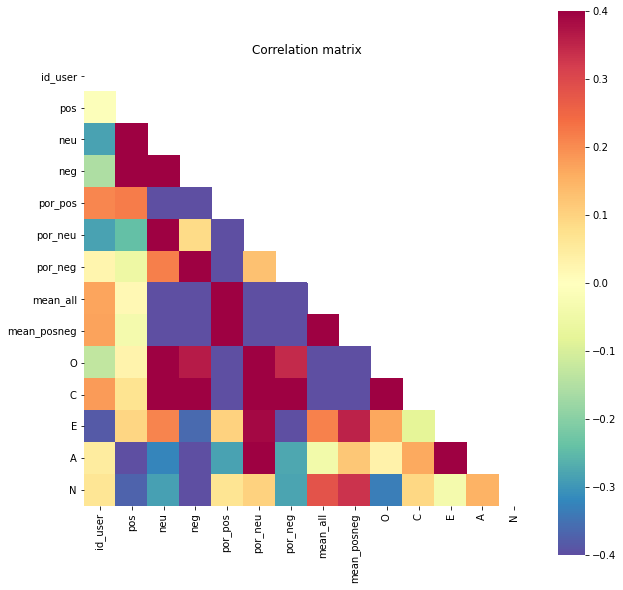

In [45]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

corrs = df_chart.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

In [46]:
df_chart.rcorr(upper='pval', decimals=3, padjust=None, stars=False)

id_user     pos     neu     neg por_pos por_neu por_neg mean_all  \
id_user           -   0.981   0.460   0.691   0.591    0.46   0.944    0.660   
pos          -0.009       -   0.027   0.043   0.571   0.531   0.887    0.963   
neu          -0.283   0.724       -    0.01   0.217    0.24   0.576    0.126   
neg          -0.154   0.682     0.8       -   0.272   0.829   0.056    0.090   
por_pos       0.208   0.219  -0.457  -0.411       -   0.003   0.070    0.000   
por_neu      -0.284  -0.242   0.437   0.085  -0.853       -   0.739    0.034   
por_neg       0.028  -0.055   0.217   0.654  -0.628    0.13       -    0.022   
mean_all      0.171   0.018  -0.549  -0.596   0.944  -0.704  -0.743        -   
mean_posneg   0.173  -0.035  -0.525  -0.676   0.876  -0.555  -0.837     0.98   
O            -0.129   0.028   0.557   0.365  -0.658   0.607   0.345   -0.652   
C             0.184   0.071   0.592   0.451  -0.775   0.702   0.425   -0.702   
E            -0.384   0.096   0.212  -0.362   0.101    0.39  -0.773    0.213   
A             0.049  -0.601  -0.323  -0.566  -0.284   0.546  -0.275   -0.042   
N             0.064   -0.37  -0.285  -0.416   0.067   0.101  -0.278    0.282   

            mean_posneg       O       C       E      A      N  
id_user           0.657   0.741   0.635   0.307  0.901  0.870  
pos                0.93   0.943   0.856   0.805  0.087  0.327  
neu               0.147   0.119   0.093   0.584  0.397  0.457  
neg               0.045   0.335   0.223   0.338  0.112  0.266  
por_pos           0.002   0.054   0.014   0.796  0.459  0.864  
por_neu           0.121   0.083   0.035   0.299  0.128  0.796  
por_neg           0.005   0.363   0.255   0.015  0.473  0.468  
mean_all          0.000   0.057   0.035   0.582  0.915  0.462  
mean_posneg           -   0.094   0.078    0.35  0.760  0.381  
O                -0.591       -   0.029   0.666  0.931  0.379  
C                -0.615    0.72       -   0.836  0.674  0.811  
E                 0.354   0.168  -0.081       -  0.271  0.928  
A                 0.119   0.034   0.163   0.412      -  0.699  
N                 0.333  -0.334   0.094  -0.036  0.151      -

In [47]:
pg.homoscedasticity(df_chart)

W      pval  equal_var
levene  0.409666  0.913109       True

In [48]:
pg.normality(df_chart)

W      pval  normal
id_user      0.937227  0.553027    True
pos          0.929693  0.478426    True
neu          0.930462  0.485758    True
neg          0.909613  0.313174    True
por_pos      0.880259  0.158009    True
por_neu      0.927654  0.459330    True
por_neg      0.960156  0.799957    True
mean_all     0.885037  0.177283    True
mean_posneg  0.904929  0.281975    True
O            0.928189  0.464295    True
C            0.771159  0.009526   False
E            0.796157  0.018457   False
A            0.836386  0.052640    True
N            0.984958  0.984873    True

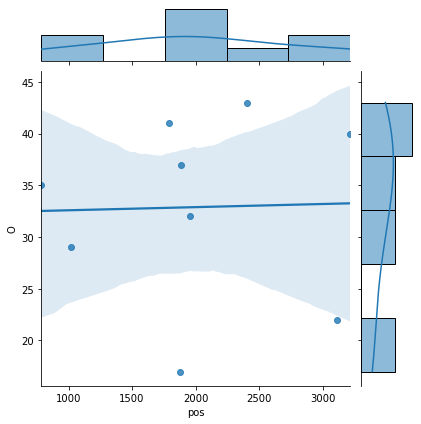

In [49]:
sns.jointplot(data=df_chart, x='pos', y='O', kind='reg')

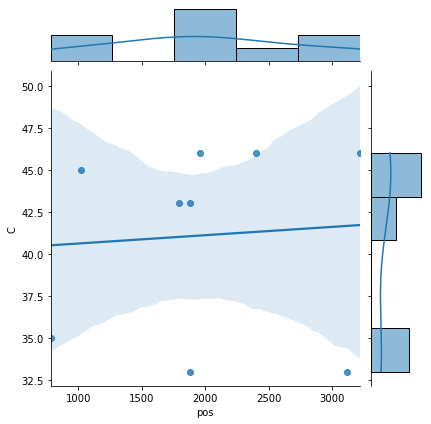

In [50]:
sns.jointplot(data=df_chart, x='pos', y='C', kind='reg')

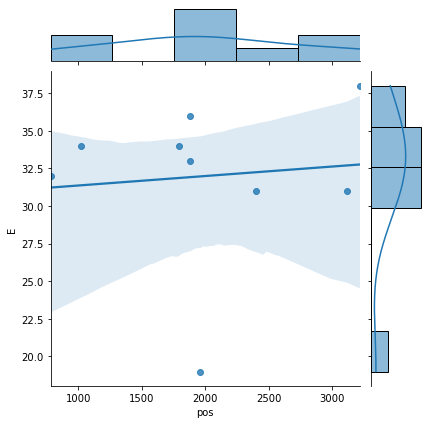

In [51]:
sns.jointplot(data=df_chart, x='pos', y='E', kind='reg')

y=30.78+-0.00x, r=-0.60


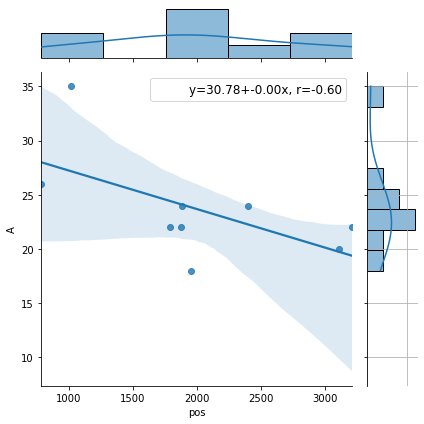

In [76]:
annot_kws = {'prop':{'size':12}}

slope, intercept, r, p, stderr = scipy.stats.linregress(df_chart['pos'], df_chart['A'])
line = f'y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)

p = sns.jointplot(data=df_chart, x='pos', y='A', kind='reg')
p.ax_marg_y.grid('on')
phantom, = p.ax_joint.plot([], [], linestyle="", alpha=0)
p.ax_joint.legend([phantom],['{}'.format(line)], **annot_kws)

plt.tight_layout()

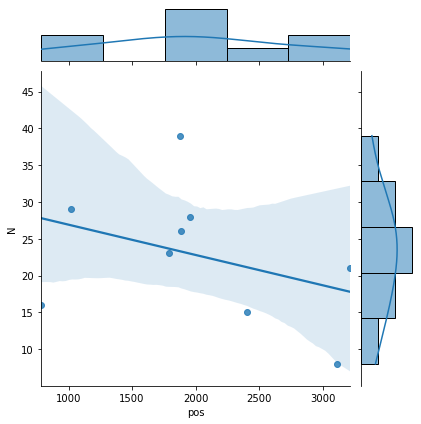

In [53]:
sns.jointplot(data=df_chart, x='pos', y='N', kind='reg')

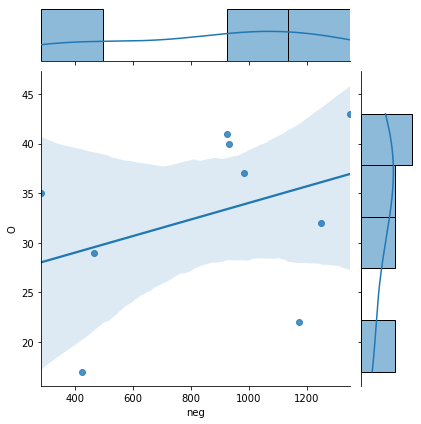

In [54]:
sns.jointplot(data=df_chart, x='neg', y='O', kind='reg')

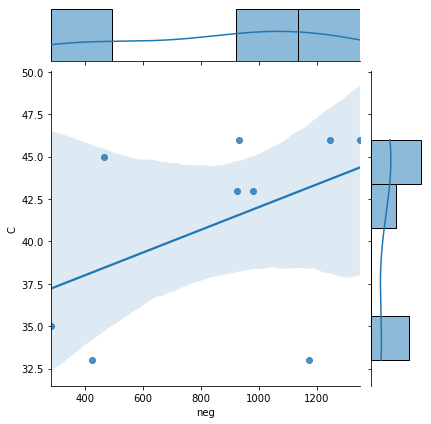

In [55]:
sns.jointplot(data=df_chart, x='neg', y='C', kind='reg')

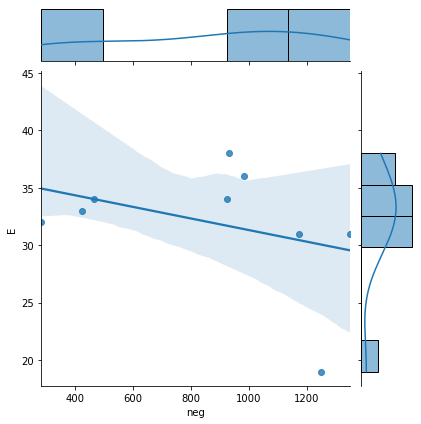

In [56]:
sns.jointplot(data=df_chart, x='neg', y='E', kind='reg')

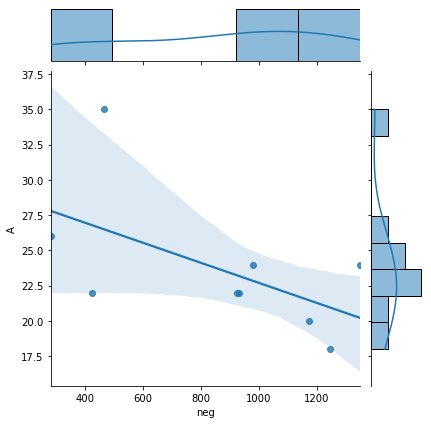

In [57]:
sns.jointplot(data=df_chart, x='neg', y='A', kind='reg')

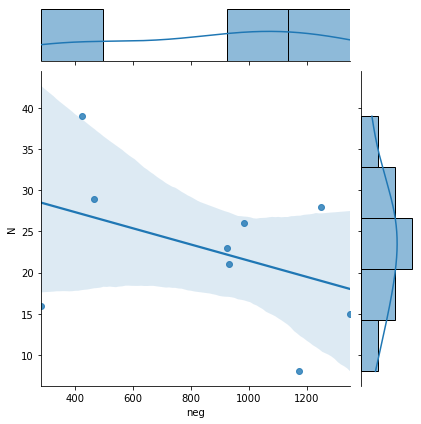

In [58]:
sns.jointplot(data=df_chart, x='neg', y='N', kind='reg')

In [59]:
df_chart

id_user   pos   neu   neg    por_pos    por_neu    por_neg  mean_all  \
0        26  1884  2173   982  37.388371  43.123636  19.487994  0.067120   
1        27  1792  1832   925  39.393273  40.272587  20.334139  0.063015   
2        28  2401  2182  1350  40.468566  36.777347  22.754087  0.079176   
4        30  1878   869   425  59.205549  27.395965  13.398487  0.175408   
5        31  3114  1709  1173  51.934623  28.502335  19.563042  0.106356   
8        34   783   480   282  50.679612  31.067961  18.252427  0.124757   
9        35  1021  1109   465  39.344894  42.736031  17.919075  0.086705   
11       37  3218  2306   932  49.845105  35.718711  14.436183  0.115668   
12       38  1956  1504  1248  41.546304  31.945624  26.508071  0.070740   

    mean_posneg   O   C   E   A   N  
0      0.118010  37  43  36  24  26  
1      0.105505  41  43  34  22  23  
2      0.125234  43  46  31  24  15  
4      0.241596  17  33  33  22  39  
5      0.148755  22  33  31  20   8  
8      0.180985  35  35  32  26  16  
9      0.151412  29  45  34  35  29  
11     0.179941  40  46  38  22  21  
12     0.103946  32  46  19  18  28

In [60]:
print(pg.mwu(df_chart['pos'], df_chart['O']))
print(pg.mwu(df_chart['neg'], df_chart['O']))

     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000412 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000412 -1.0   1.0


In [61]:
print(pg.mwu(df_chart['pos'], df_chart['C']))
print(pg.mwu(df_chart['neg'], df_chart['C']))

     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000395 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000395 -1.0   1.0


In [62]:
print(pg.mwu(df_chart['pos'], df_chart['E']))
print(pg.mwu(df_chart['neg'], df_chart['E']))

     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000407 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000407 -1.0   1.0


In [63]:
print(pg.mwu(df_chart['pos'], df_chart['A']))
print(pg.mwu(df_chart['neg'], df_chart['A']))

     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000398 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000398 -1.0   1.0


In [64]:
print(pg.mwu(df_chart['pos'], df_chart['N']))
print(pg.mwu(df_chart['neg'], df_chart['N']))

     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000412 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000412 -1.0   1.0


In [65]:
print(pg.kruskal(data=df_chart, dv='pos', between='O'))
print(pg.kruskal(data=df_chart, dv='neg', between='O'))

        Source  ddof1    H    p-unc
Kruskal      O      8  8.0  0.43347
        Source  ddof1    H    p-unc
Kruskal      O      8  8.0  0.43347


In [66]:
print(pg.kruskal(data=df_chart, dv='pos', between='C'))
print(pg.kruskal(data=df_chart, dv='neg', between='C'))

        Source  ddof1         H     p-unc
Kruskal      C      4  6.044444  0.195854
        Source  ddof1         H    p-unc
Kruskal      C      4  4.911111  0.29654


In [67]:
print(pg.kruskal(data=df_chart, dv='pos', between='E'))
print(pg.kruskal(data=df_chart, dv='neg', between='E'))

        Source  ddof1         H     p-unc
Kruskal      E      6  7.866667  0.248035
        Source  ddof1         H     p-unc
Kruskal      E      6  7.666667  0.263555


In [68]:
print(pg.kruskal(data=df_chart, dv='pos', between='A'))
print(pg.kruskal(data=df_chart, dv='neg', between='A'))

        Source  ddof1         H     p-unc
Kruskal      A      5  4.977778  0.418598
        Source  ddof1         H     p-unc
Kruskal      A      5  6.777778  0.237699


In [69]:
print(pg.kruskal(data=df_chart, dv='pos', between='N'))
print(pg.kruskal(data=df_chart, dv='neg', between='N'))

        Source  ddof1    H    p-unc
Kruskal      N      8  8.0  0.43347
        Source  ddof1    H    p-unc
Kruskal      N      8  8.0  0.43347
